## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- **The client with payment difficulties**: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- **All other cases**: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- **Approved**: The Company has approved loan Application

- **Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- **Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

- **Unused offer**:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

This dataset has 3 files: 

1. **'application_data.csv'**  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
2. **'previous_application.csv'** contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. **'columns_description.csv'** is data dictionary which describes the meaning of the variables.

In [1]:
# Import libraries required for this case study
# remove the warnings when we run program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'/Users/shivamjha/DataScience/EDA/EDACaseStudy'

## Current DataSet - application_data.csv

In [3]:
# reading application_data dataset which is in CSV format and get the number of rows and column in dataset
current_app_data = pd.read_csv("/Users/shivamjha/DataScience/EDA/EDACaseStudy/application_data.csv")
current_app_data.shape

(307511, 122)

In [4]:
# using head() function to get the first 10 rows.
current_app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Use info() method of pandas to get rows and columns,the data type of each column, and the number of non-NaN elements
# This will give us concise summary of the dataframe application_data
current_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# print the full summary of dataframe application_data which has two important parameters 'verbose' and null_counts
# verbose : Whether to print the full summary.True or False value
# null_counts : Whether to show the non-null counts(If True will show counts and if False not show counts)

current_app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
# use describe() to view statistical details like percentile, mean, std etc. of a dataframe appcurrent_app_data
current_app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Listout data type and their counts
current_app_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

there are total:
- 65 columns with dtype=float64
- 41 columns with dtype=int64
- 16 columns with dtype=object

## Cleaning  & Imputation of the missing Data in columns


In [9]:
# Count the missing values in columns
current_app_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
# this will give lenth/row of dataset
len(current_app_data)

307511

In [11]:
# Sort in descending order
current_app_data.isna().sum().sort_values(ascending=False).head(60)


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [12]:
# get the number of rows and column in dataset
current_app_data.shape

(307511, 122)

In [13]:
# Calculate 30% of rows
x = len(current_app_data)*.30
x

92253.3

In [14]:
# if a column contains more than 30% of its values missing, delete that column

current_app_data_missing_values = (current_app_data.columns[current_app_data.isnull().sum() >= x]).tolist()
current_app_data_missing_values

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

#### Analyse and delete the columns which have more than 30% missing values

In [15]:
# Count the number of missing values column
len(current_app_data_missing_values)

50

#### Learning Notes:
- When using drop only, it drops the columns/rows you define
- When using dropna, it removes all entries with NaN values (or null in general)

In [16]:
# Delete the columns having more than 30% missing values
# axis: It determines the axis to remove. Set it to 1 or column to remove columns containing missing values.
# By default, it removes rows with NA from DataFrame.
current_app_data = current_app_data.drop(current_app_data_missing_values,axis=1)

In [17]:
current_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [18]:
current_app_data.shape

(307511, 72)

- Orginal dataframe had 122 columns but after deleting the columns which had more than 30% missing values the count of columns reduced to 72

In [19]:
#Count non-NA cells for each column
current_app_data.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 72, dtype: int64

##### Analyse the columns, which are irrelevant for the analysis

In [20]:
irrelevant_columns = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
irrelevant_columns

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [21]:
# delete the columns which are irrelevant for the analysis
current_app_data = current_app_data.drop(irrelevant_columns,axis=1)

In [22]:
current_app_data.shape

(307511, 53)

In [23]:
current_app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCU

In [24]:
current_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### Analyse the Missing Values in Rows

In [25]:
# percentage of missing values in each column
round(100*(current_app_data.isnull().sum()/len(current_app_data.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
F

In [26]:
# Count the rows for which EXT_SOURCE_2 and EXT_SOURCE_3 both are empty
# The np.isnan() function tests element-wise whether it is NaN or not
len(current_app_data[np.isnan(current_app_data['EXT_SOURCE_2']) & np.isnan(current_app_data['EXT_SOURCE_3'])])

230

In [27]:
# As there are only 230 such records we can delete those.
# Note:- As we have total 307511 records deleting only 230 records will not affect our further analysis
current_app_data = current_app_data[(~(np.isnan(current_app_data['EXT_SOURCE_2']) & np.isnan(current_app_data['EXT_SOURCE_3'])))]

In [28]:
# Comparing EXT_SOURCE_2 and EXT_SOURCE_3 column 
round(current_app_data.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),3)

,EXT_SOURCE_2,EXT_SOURCE_3
count,306851.000,246546.000
mean,0.514,0.511
std,0.191,0.195
min,0.000,0.001
25%,0.392,0.371
50%,0.566,0.535
75%,0.664,0.669
max,0.855,0.896


- the difference between mean and median which is narrow for both the columns.
- the variation from 25th to 75th percentile is equally distributed. 
- it's wise to impute the missing values by the mean value of EXT_SOURCE_2 and EXT_SOURCE_3.

In [29]:
# Imputing EXT_SOURCE_2 and EXT_SOURCE_3 by mean values
current_app_data.loc[np.isnan(current_app_data['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = current_app_data['EXT_SOURCE_2'].mean()
current_app_data.loc[np.isnan(current_app_data['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = current_app_data['EXT_SOURCE_3'].mean()


In [30]:
(round(100*(current_app_data.isnull().sum()/len(current_app_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
F

#### Learning Notes:
- The describe() method returns description of the data in the DataFrame.

- If the DataFrame contains numerical data, the description contains these information for each column:
* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation.
* min - the minimum value.
* 25% - The 25% percentile*.
* 50% - The 50% percentile*.
* 75% - The 75% percentile*.
* max - the maximum value.

In [31]:
# generate descriptive statistics on 'AMT_GOODS_PRICE' of dataframe
current_app_data['AMT_GOODS_PRICE'].describe()

count    3.070040e+05
mean     5.384842e+05
std      3.694861e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [32]:
# remove exponent notation in AMT_GOODS_PRICE
current_app_data['AMT_GOODS_PRICE'].describe().apply(lambda x: '%.2f' % x)

count     307004.00
mean      538484.20
std       369486.08
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

Learning Notes:

Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower quartile, median and upper quartile.

A box plot consist of 5 things.

- Minimum
- First Quartile or 25%
- Median (Second Quartile) or 50%
- Third Quartile or 75%
- Maximum


<AxesSubplot:>

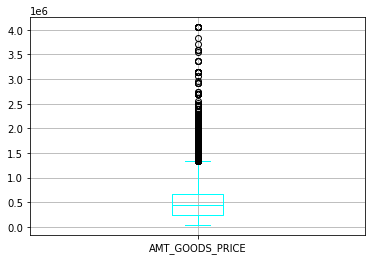

In [33]:
#  make a box plot from DataFrame AMT_GOODS_PRICE columns
current_app_data.boxplot(column =['AMT_GOODS_PRICE'], color='Cyan') 

- the standard deviation of AMT_GOODS_PRICE is very high.
- there are good amount of outliers in the colum as well.
- imputing missing values with mean or median will not be correct solutions
- these rows are only 0.09% of the whole record it is good to remove the rows with missing AMT_GOODS_PRICE.

In [34]:
current_app_data = current_app_data[~np.isnan(current_app_data['AMT_GOODS_PRICE'])]

In [35]:
(round(100*(current_app_data.isnull().sum()/len(current_app_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
F

- There are 5 columns for the number of enquiries to Credit Bureau about the client.
- It doesn't make much sense to count the number for an hour or a day or a week. 
- We will delete the column for the count of hour, day, week, month and year.

In [36]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
current_app_data = current_app_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [37]:
(round(100*(current_app_data.isnull().sum()/len(current_app_data.index)),2))

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3     

In [38]:
current_app_data.shape

(307004, 47)

- now have a dataframe with no missing values.
- At the begining we had 307511 rows now we have 307004 we lost 507 row in the process.

In [39]:
# Percentage of rows lost
(100 - 100*(len(current_app_data.index)/307511))

0.16487215091493113

- We lost 0.16% rows in the entire data cleaning process

#### Convert  DAYS_EMPLOYED column into YEARS_EMPLOYED column for readablity and analysis

In [40]:
# Divide 'DAYS_EMPLOYED' by 365 for YEAR_EMPLOYED
current_app_data['YEARS_EMPLOYED'] = abs(current_app_data['DAYS_EMPLOYED']//365)

In [41]:
# Drop 'DAYS_EMPLOYED' column
current_app_data = current_app_data.drop(['DAYS_EMPLOYED'],axis=1)

#### Convert DAYS_BIRTH column into AGE column for readablity and analysis

In [42]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
current_app_data['AGE'] = abs(current_app_data['DAYS_BIRTH']//365)


In [43]:
# Drop 'DAYS_BIRTH' column
current_app_data = current_app_data.drop(['DAYS_BIRTH'],axis=1)

In [44]:
current_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,YEARS_EMPLOYED,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,2,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,4,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,1,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,9,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,9,55


In [45]:
current_app_data.shape

(307004, 47)

#### Learning Notes:
Inter quartile range (IQR) method
https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097
1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR= Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
5. Any data point outside this range is considered as outlier and should be removed for further analysis.

### Removing outliers

In [46]:
# Finding outliers in all the numerical columns with 1.5 IQR rule () and removing the outlier records 
col_list_outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for col in col_list_outlier: 
    q1 = current_app_data[col].quantile(0.25) # Find the first quartile, Q1.
    q3 = current_app_data[col].quantile(0.75) # Find the third quartile, Q3.
    iqr = q3-q1 # Calculate the IQR. IQR= Q3-Q1.
    range_low  = q1-1.5*iqr # Define the normal data range with lower limit as Q1–1.5*IQR
    range_high = q3+1.5*iqr # Define the normal data range with upper limit as Q3+1.5*IQR.
    
    # Any data point outside this range is considered as outlier and should be removed for further analysis.
    current_app_data = current_app_data.loc[(current_app_data[col] > range_low) & (current_app_data[col] < range_high)]

current_app_data.shape

(275984, 47)

In [47]:
# Percentage of rows lost
round((100 - 100*(len(current_app_data.index)/307511)),2)

10.25

- we lost around 10% rows in the outliers handling exercise which is necessary to get rid of the outliers for fair analysis of the data.  

### Analyse the Data Imbalance

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. We can better understand it with an example.

Let’s assume that XYZ is a bank that issues a credit card to its customers. Now the bank is concerned that some fraudulent transactions are going on and when the bank checks their data they found that for each 2000 transaction there are only 30 Nos of fraud recorded. So, the number of fraud per 100 transactions is less than 2%, or we can say more than 98% transaction is “No Fraud” in nature. Here, the class “No Fraud” is called the majority class, and the much smaller in size “Fraud” class is called the minority class.

#####  Approach to deal with the imbalanced dataset problem
- it is good to identify the minority classes correctly.
- So model should not be biased to detect only the majority class but should give equal weight or importance towards the minority class too.
- create two dataframe of majority and minority class

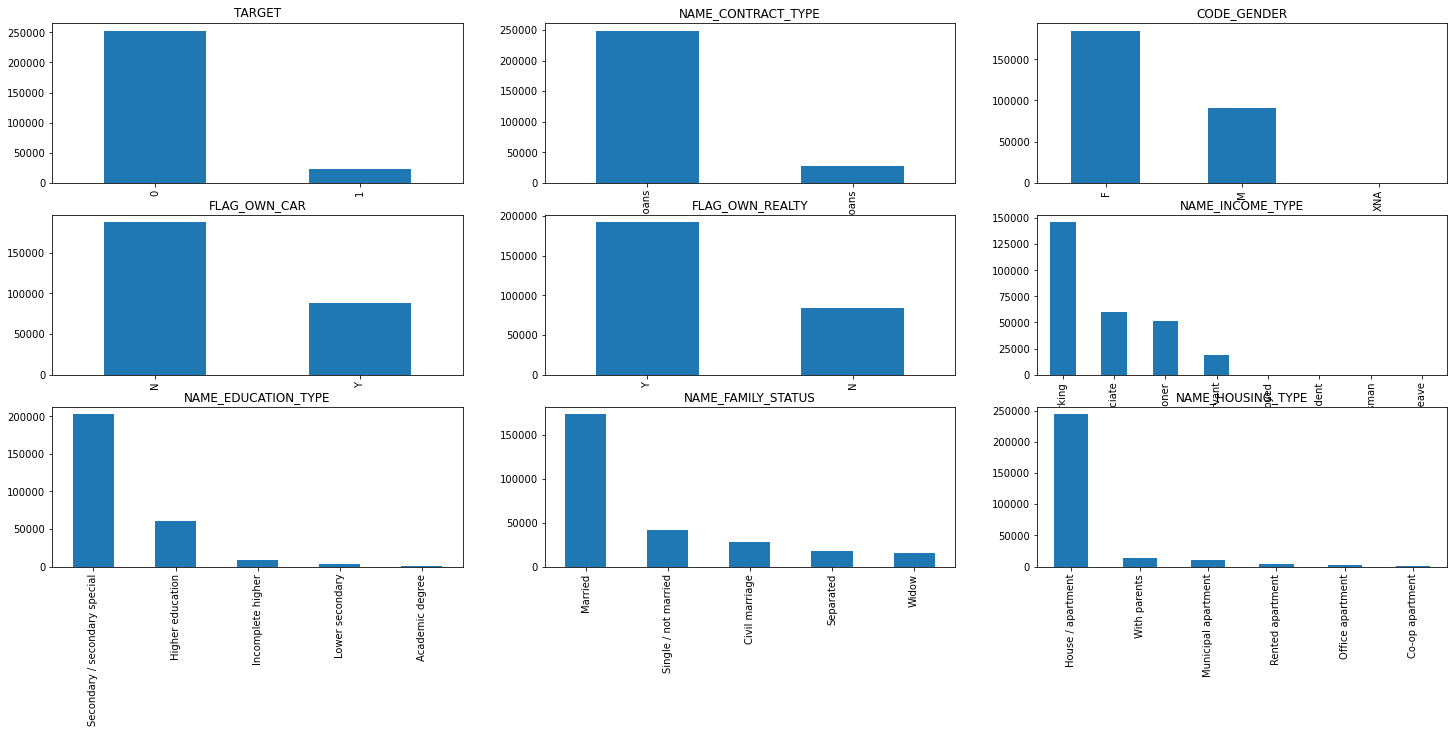

In [48]:
##### Listing columns for checking data imbalance and plotting them
columns_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
# Plotting a figure of width 25 and height 10
# The figsize attribute allows us to specify the width and height of a figure in unit inches.
plt.figure(figsize=(25,10))  
for column in columns_list:    
    k=k+1
    # The subplot() function takes three arguments that describes the layout of the figure.
    # The layout is organized in rows and columns, which are represented by the first and second argument.
   # The third argument k represents the index of the current plot.
    plt.subplot(3, 3, k)    
    
    # find the count of unique values in the column
    current_app_data[column].value_counts().plot(kind='bar');
    plt.title(column)

We can see that there is data imbalance in below columns:-
-  `TARGET` -  There are very few defaulters(1) compare to non defaulters(0)
-  `NAME_CONTRACT_TYPE` - There are very few Revolving loans than Cash loans
-  `NAME_EDUCATION_TYPE` - Most of the loans applied by Secondary/Secondary special educated people
-  `NAME_FAMILY_STATUS` - Most of the loans applied by Married people.
-  `NAME_HOUSING_TYPE` - Most of the application came from Home/appartment owner


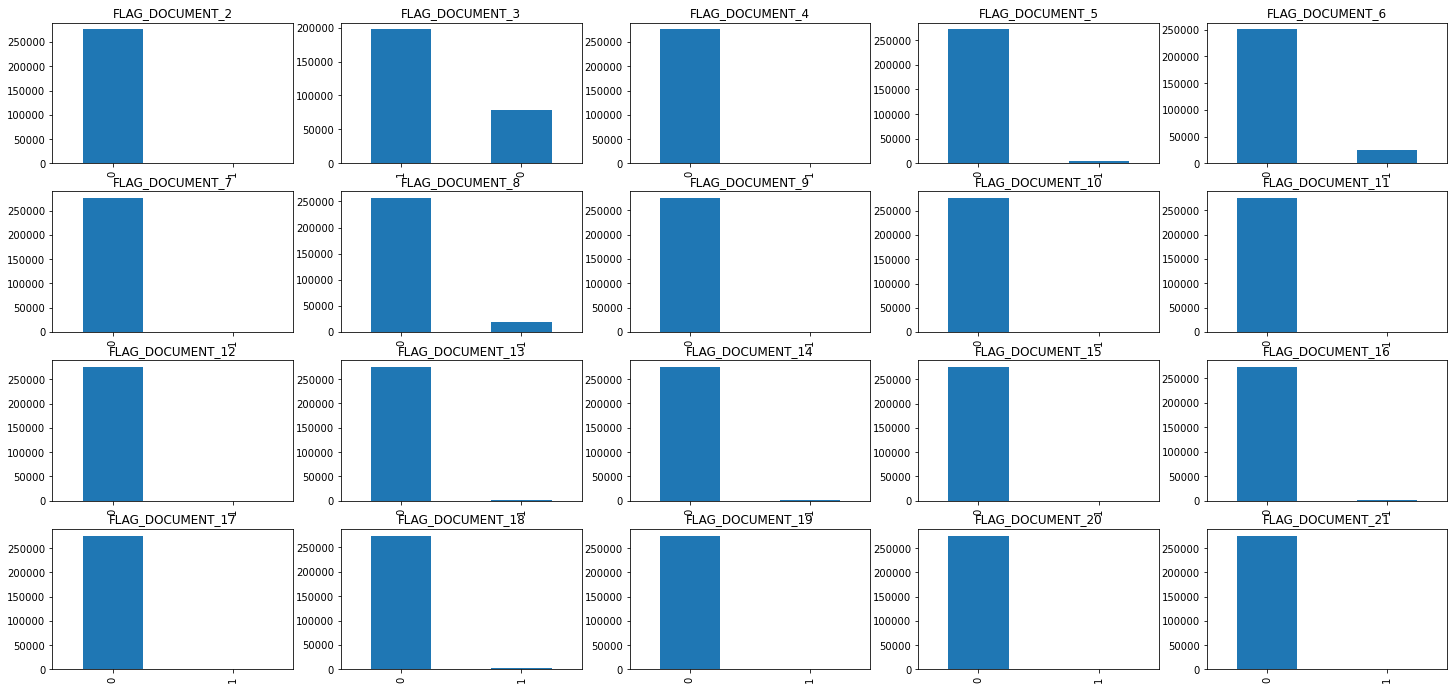

In [49]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(25,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = 'FLAG_DOCUMENT_'+str(i)
    current_app_data[col_name].value_counts().plot(kind='bar');
    plt.title(col_name)

- remove all the FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
- in above BAR plot we can that except FLAG_DOCUMENT_3 all the columns have zero or less count of target value 1.

In [50]:
# Delete all teh FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
current_app_data.drop('FLAG_DOCUMENT_2',axis=1,inplace=True)
for i in range(4,22):
    columns = 'FLAG_DOCUMENT_'+str(i)
    current_app_data.drop(columns,axis=1,inplace=True)

In [51]:
current_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,YEARS_EMPLOYED,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,2,0,0,Business Entity Type 3,0.262949,0.139376,1,2,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,1,0,0,School,0.622246,0.510853,1,4,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,2,0,0,Government,0.555912,0.729567,0,1,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,2,0,0,Business Entity Type 3,0.650442,0.510853,1,9,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,2,0,0,Religion,0.322738,0.510853,0,9,55


### Learning Notes:
What is Binning ?
- Data binning, also called discrete binning or bucketing, is a data pre-processing technique used to reduce the effects of minor observation errors.
- It is a form of quantization. The original data values are divided into small intervals known as bins, and then they are replaced by a general value calculated for that bin. This has a soothing effect on the input data and may also reduce the chances of over fitting in the case of small datasets.


#### Bucketing  of  AGE ,  AMT_INCOME_TOTAL , AMT_CREDIT and EXT_SOURCE_SCORE columns

#### Creating three age groups - Young, Mid age and Senior citizen

In [52]:
current_app_data['AGE'].describe()

count    275984.000000
mean         44.432492
std          12.117228
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: AGE, dtype: float64

In [53]:
# Define function for categorizing AGE_GROUP (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [54]:
#Creating new column AGE_GROUP
current_app_data['AGE_GROUP'] = current_app_data['AGE'].apply(age_group)
current_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,YEARS_EMPLOYED,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,0,0,Business Entity Type 3,0.262949,0.139376,1,2,26,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,0,0,School,0.622246,0.510853,1,4,46,Mid Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,0,0,Government,0.555912,0.729567,0,1,53,Mid Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,0,0,Business Entity Type 3,0.650442,0.510853,1,9,53,Mid Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,0,0,Religion,0.322738,0.510853,0,9,55,Mid Age


#### Creating three credit amount groups - High, medium and low

In [55]:
round(current_app_data['AMT_CREDIT'].describe(),2)

count     275984.00
mean      530094.81
std       318167.91
min        45000.00
25%       269550.00
50%       472500.00
75%       753840.00
max      1558813.50
Name: AMT_CREDIT, dtype: float64

In [56]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [57]:
#Creating new column AGE_GROUP
current_app_data['CREDIT_GROUP'] = current_app_data['AMT_CREDIT'].apply(credit_group)
current_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,YEARS_EMPLOYED,AGE,AGE_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,0.262949,0.139376,1,2,26,Young,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,0.622246,0.510853,1,4,46,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,0.555912,0.729567,0,1,53,Mid Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,0.650442,0.510853,1,9,53,Mid Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,Religion,0.322738,0.510853,0,9,55,Mid Age,Medium


#### Creating three income groups - Hign, medium and Low

In [58]:
current_app_data['AMT_INCOME_TOTAL'].describe()

count    275984.000000
mean     149865.585983
std       61031.656226
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [59]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [60]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL (Low, Medium and High)
current_app_data['INCOME_GROUP'] = current_app_data['AMT_INCOME_TOTAL'].apply(income_group)
current_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,YEARS_EMPLOYED,AGE,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Business Entity Type 3,0.262949,0.139376,1,2,26,Young,Low,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,School,0.622246,0.510853,1,4,46,Mid Age,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Government,0.555912,0.729567,0,1,53,Mid Age,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,Business Entity Type 3,0.650442,0.510853,1,9,53,Mid Age,Low,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,Religion,0.322738,0.510853,0,9,55,Mid Age,Medium,Medium


- For the simplification of analysis of Normalized score from external data source, we are taking average of two different external data sources (EXT_SOURCE_2 and EXT_SOURCE_3) and creating a column called EXT_SOURCE_SCORE


In [61]:
current_app_data['EXT_SOURCE_SCORE'] = round(((current_app_data['EXT_SOURCE_2'] + current_app_data['EXT_SOURCE_3'])/2),2)
current_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,YEARS_EMPLOYED,AGE,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.262949,0.139376,1,2,26,Young,Low,High,0.20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.622246,0.510853,1,4,46,Mid Age,High,High,0.57
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,0.555912,0.729567,0,1,53,Mid Age,Low,Low,0.64
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,0.650442,0.510853,1,9,53,Mid Age,Low,Medium,0.58
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,0.322738,0.510853,0,9,55,Mid Age,Medium,Medium,0.42


In [62]:
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
current_app_data.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

In [63]:
current_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,YEARS_EMPLOYED,AGE,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,1,2,26,Young,Low,High,0.20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,1,4,46,Mid Age,High,High,0.57
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,0,1,53,Mid Age,Low,Low,0.64
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,1,9,53,Mid Age,Low,Medium,0.58
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,Religion,0,9,55,Mid Age,Medium,Medium,0.42


#### Creating three External source score groups - High, Medium and Low

In [64]:
current_app_data['EXT_SOURCE_SCORE'].describe()

count    275984.000000
mean          0.508588
std           0.135916
min           0.000000
25%           0.420000
50%           0.520000
75%           0.610000
max           0.840000
Name: EXT_SOURCE_SCORE, dtype: float64

In [65]:
# Define function for categorizing EXT_SOURCE_SCORE (Low, Medium and High)
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'

In [66]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
current_app_data['EXT_SCORE_CATEGORY'] = current_app_data['EXT_SOURCE_SCORE'].apply(ext_source_group)
current_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,YEARS_EMPLOYED,AGE,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Business Entity Type 3,1,2,26,Young,Low,High,0.20,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,School,1,4,46,Mid Age,High,High,0.57,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Government,0,1,53,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,Business Entity Type 3,1,9,53,Mid Age,Low,Medium,0.58,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,Religion,0,9,55,Mid Age,Medium,Medium,0.42,Medium


In [67]:
# Remove rows where CODE_GENDER == XNA
# There are four such rows
current_app_data = current_app_data[~(current_app_data['CODE_GENDER'] == 'XNA')]

### Divide data into two sets 
##### Customer  with payment difficulties (Target=1) 
##### All other cases (Target=0) 

In [68]:
# Numerical cols
current_app_data.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'FLAG_DOCUMENT_3', 'YEARS_EMPLOYED', 'AGE', 'EXT_SOURCE_SCORE'],
      dtype='object')

In [69]:
# below will return the column labels of the given dataframe.
current_app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'YEARS_EMPLOYED', 'AGE',
       'AGE_GROUP', 'CREDIT_GROUP', 'INCOME_GROUP', 'EXT_SOURCE_SCORE',
       'EXT_SCORE_CATEGORY'],
      dtype='object')

In [70]:
# Categorical columns = Total columns - numerical columns 
list(set(current_app_data.columns) - set(current_app_data.describe().columns))

['AGE_GROUP',
 'NAME_EDUCATION_TYPE',
 'INCOME_GROUP',
 'NAME_FAMILY_STATUS',
 'CREDIT_GROUP',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'EXT_SCORE_CATEGORY',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE']

In [71]:
total_columns = current_app_data.columns
numerical_columns = current_app_data.describe().columns
categorical_columns = list(set(current_app_data.columns) - set(current_app_data.describe().columns))
print("Total number of columns is: ",len(total_columns))
print("Total number of numerical_columns in Dataframe: ",len(numerical_columns))
print("Total number of categorical_columns in Dataframe: ",len(categorical_columns))

Total number of columns is:  31
Total number of numerical_columns in Dataframe:  18
Total number of categorical_columns in Dataframe:  13


In [72]:
# Customer with payment difficulties Target=1
current_target_1 = current_app_data[current_app_data['TARGET'] == 1]
current_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,YEARS_EMPLOYED,AGE,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Business Entity Type 3,1,2,26,Young,Low,High,0.20,Low
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,Business Entity Type 3,1,8,52,Mid Age,High,Medium,0.37,Low
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,Business Entity Type 3,1,4,48,Mid Age,High,High,0.31,Low
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,Self-employed,1,10,37,Young,Low,Medium,0.54,Medium
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,XNA,0,1000,68,Senior,Low,Low,0.37,Low


In [73]:
# Client with all other cases (Target=0)
current_target_0 = current_app_data[current_app_data['TARGET'] == 0]
current_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,YEARS_EMPLOYED,AGE,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,School,1,4,46,Mid Age,High,High,0.57,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Government,0,1,53,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,Business Entity Type 3,1,9,53,Mid Age,Low,Medium,0.58,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,Religion,0,9,55,Mid Age,Medium,Medium,0.42,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,Other,1,5,47,Mid Age,Low,Low,0.49,Medium


In [74]:
current_target_0.shape

(252868, 31)

In [75]:
current_target_1.shape

(23112, 31)

In [76]:
current_target_1.CODE_GENDER.value_counts()

F    13329
M     9783
Name: CODE_GENDER, dtype: int64

In [77]:
current_target_0.CODE_GENDER.value_counts()

F    171515
M     81353
Name: CODE_GENDER, dtype: int64

In [78]:
#relative frequencies of the unique values pandas
current_app_data.TARGET.value_counts(normalize=True)

0    0.916255
1    0.083745
Name: TARGET, dtype: float64

In [79]:
def plotting(target, target0, target1, column):
    
    target = target
    current_target_0 = target0
    current_target_0 = target1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    target[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = target, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((current_target_0[col].value_counts())/len(current_target_0))
    df['1']= ((current_target_1[col].value_counts())/len(current_target_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

Plotting  AGE_GROUP


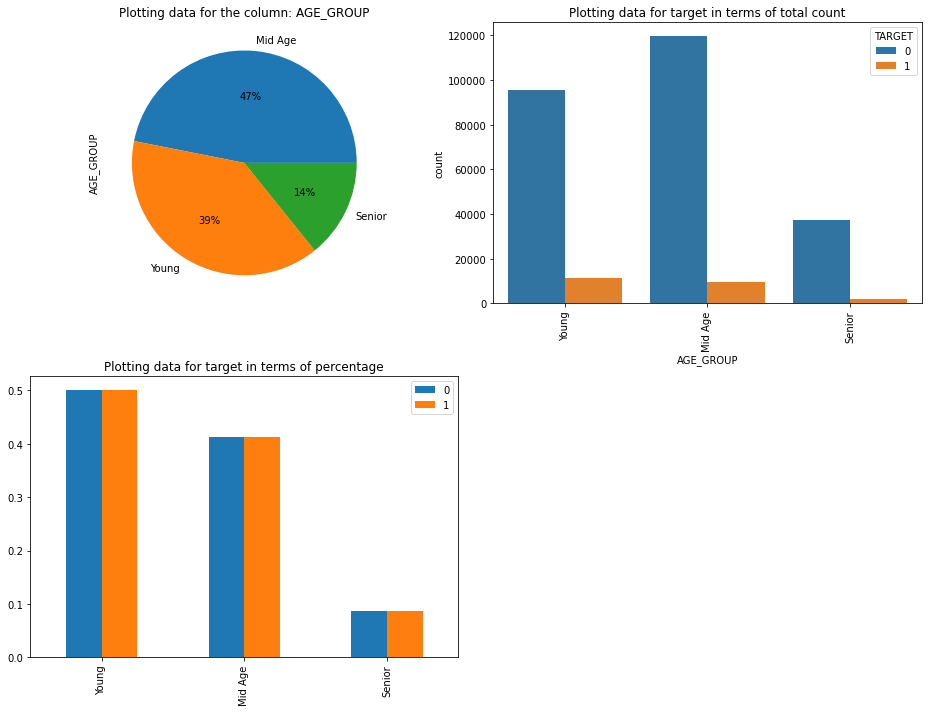

Plotting  NAME_EDUCATION_TYPE


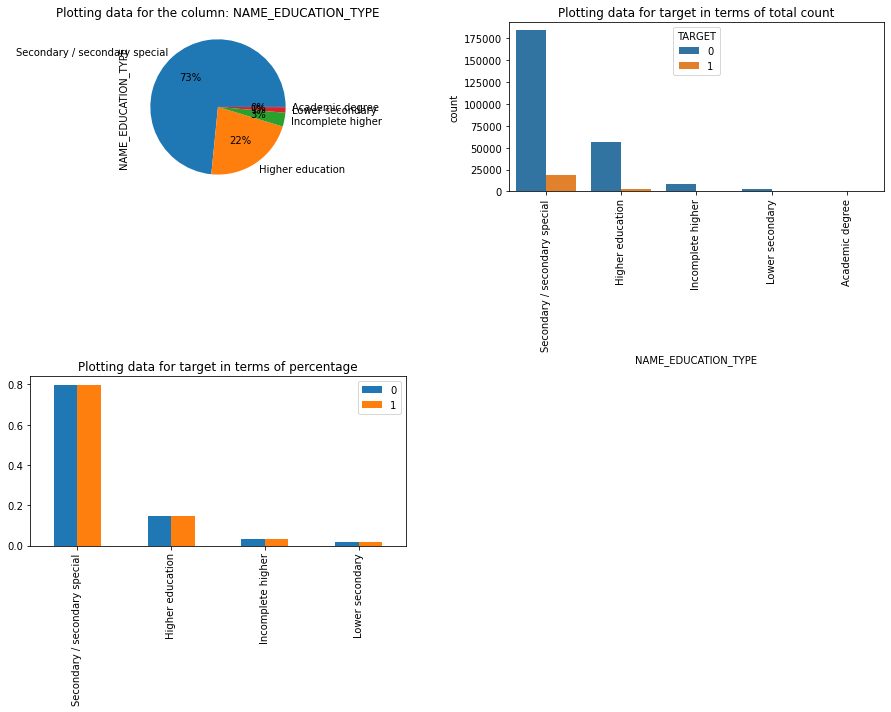

Plotting  INCOME_GROUP


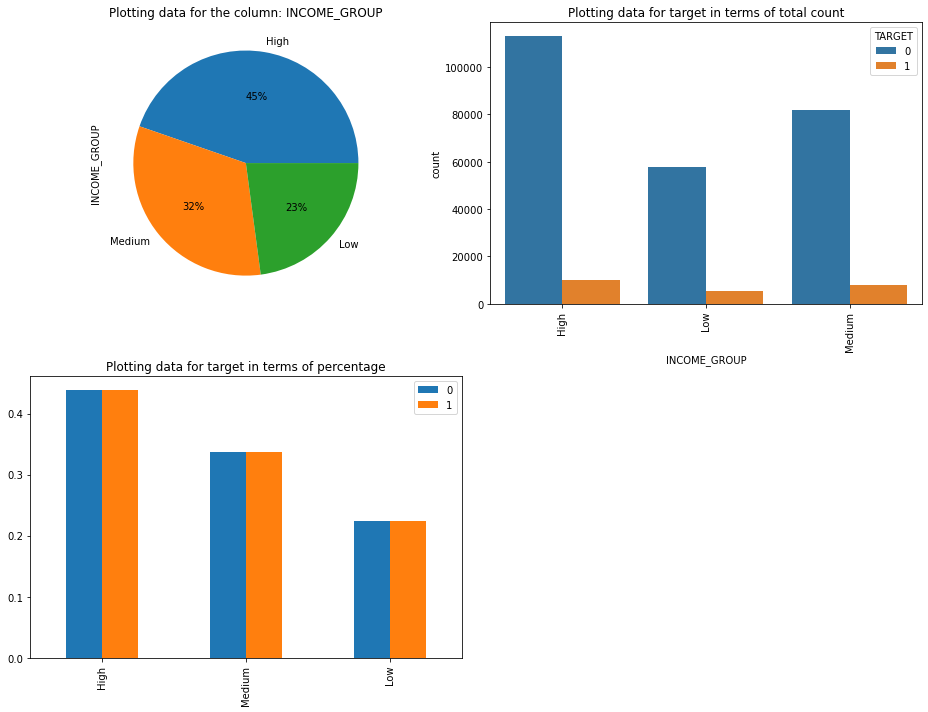

Plotting  NAME_FAMILY_STATUS


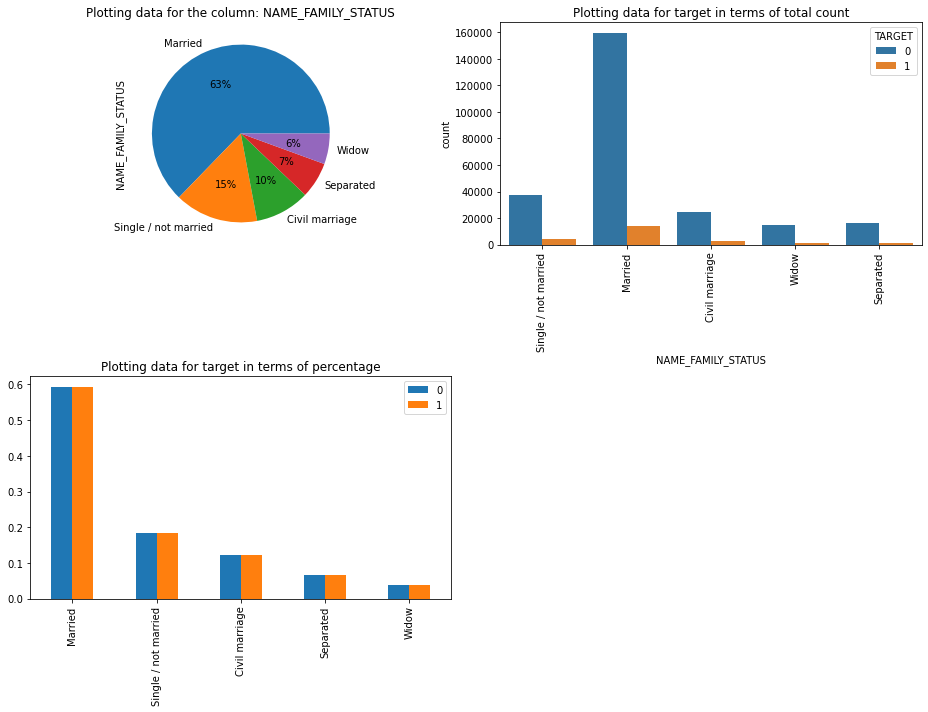

Plotting  CREDIT_GROUP


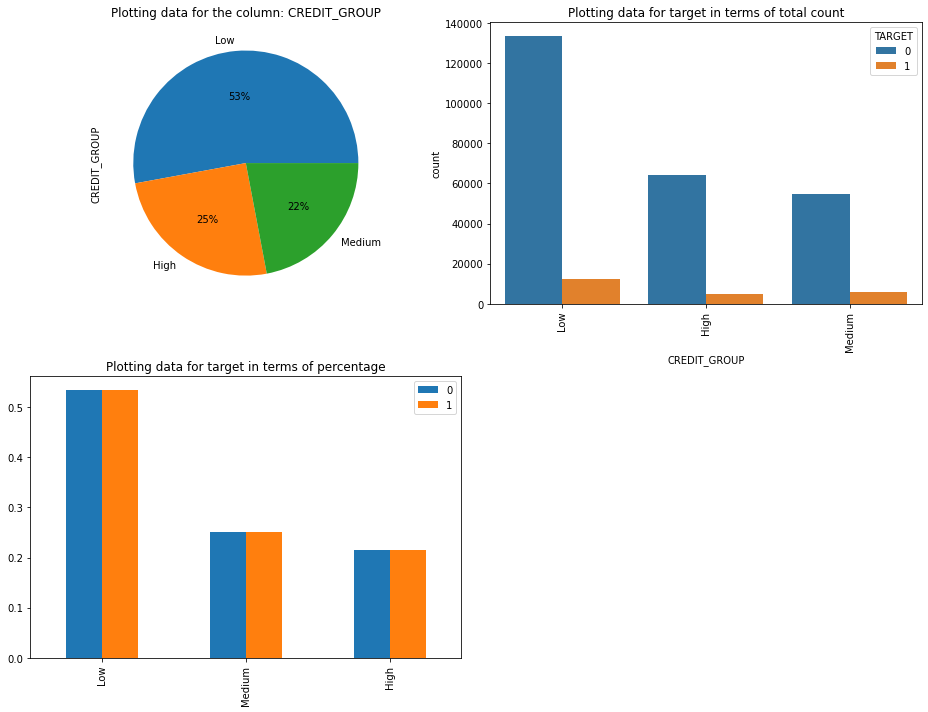

Plotting  NAME_CONTRACT_TYPE


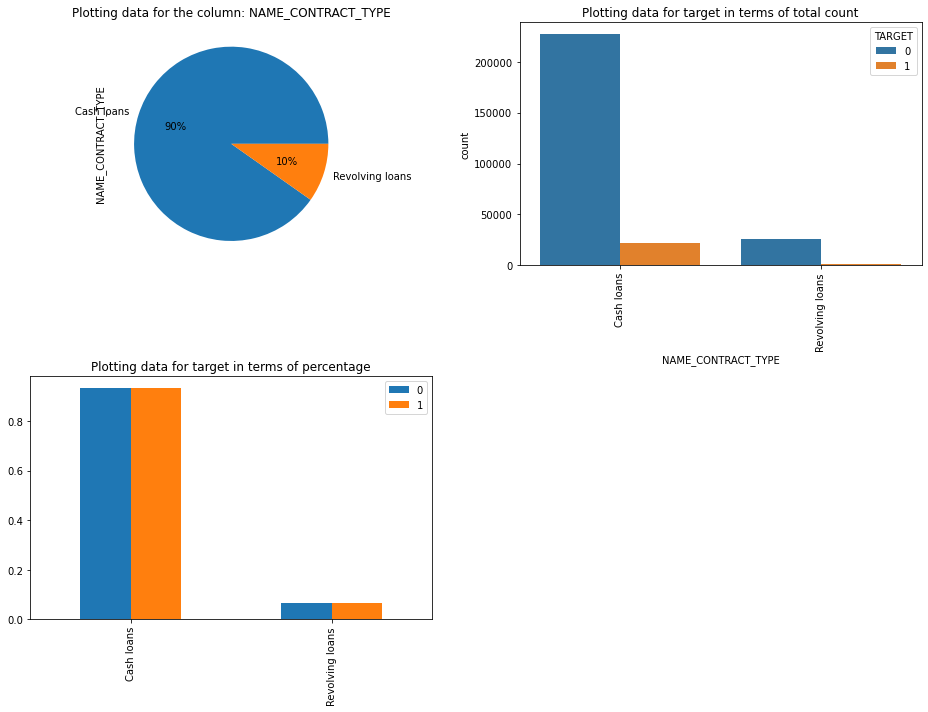

Plotting  ORGANIZATION_TYPE


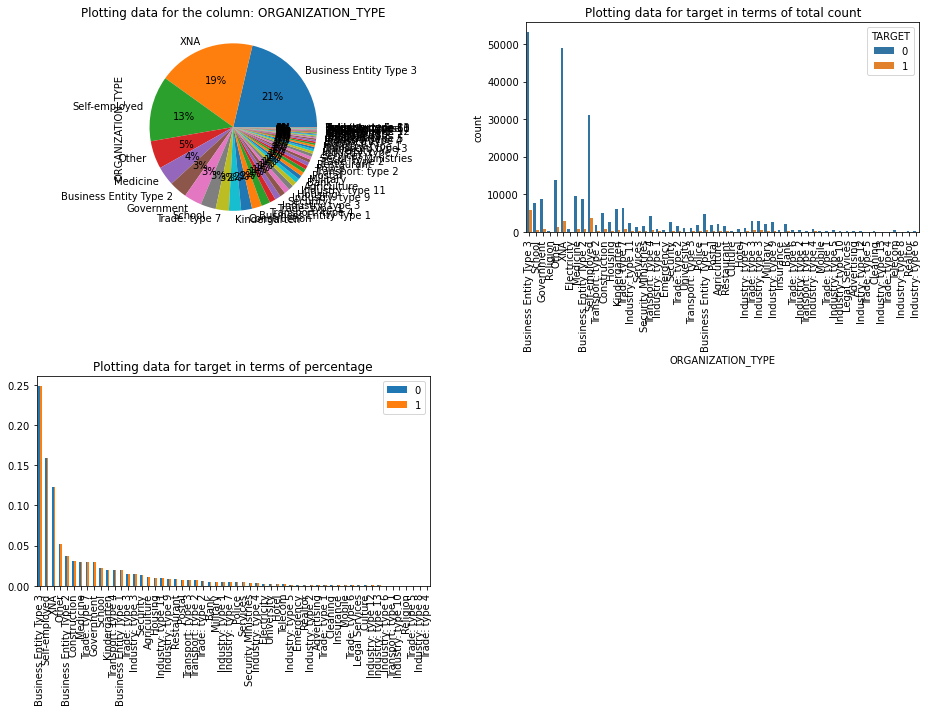

Plotting  EXT_SCORE_CATEGORY


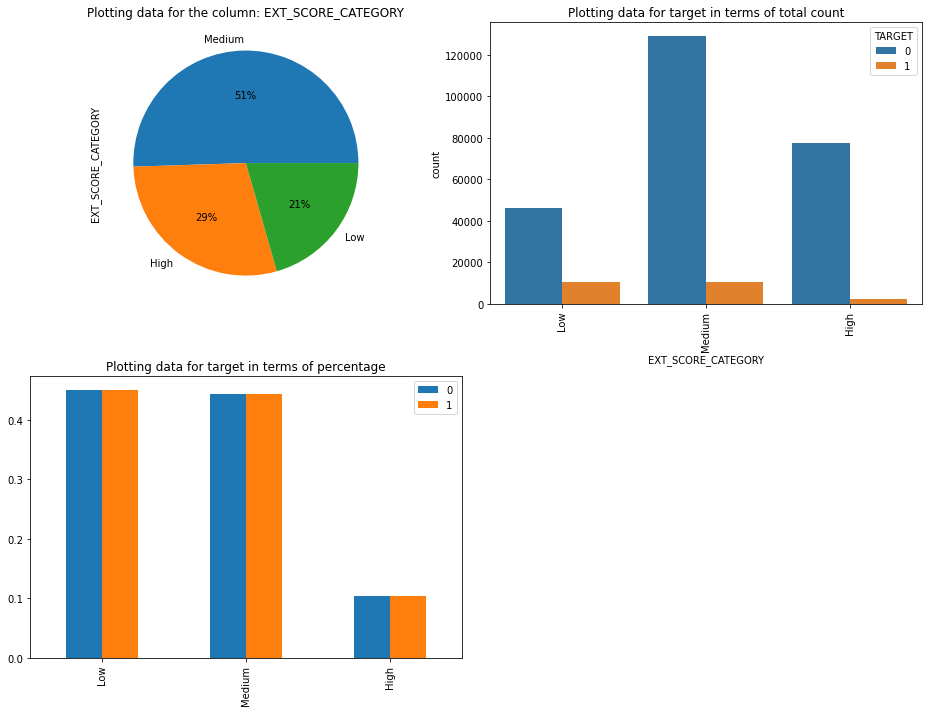

Plotting  FLAG_OWN_CAR


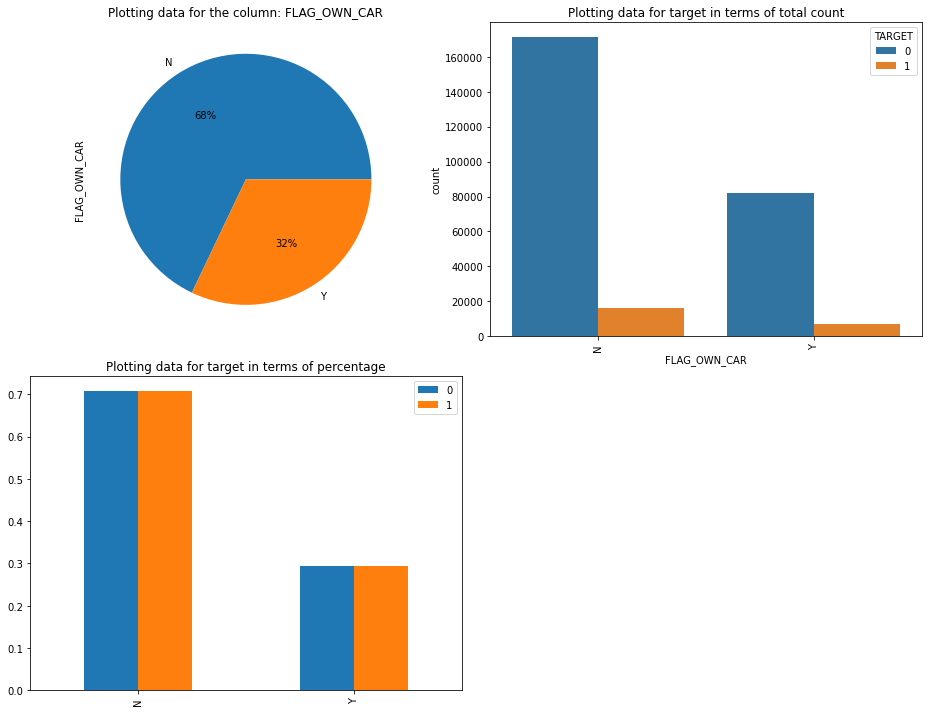

Plotting  CODE_GENDER


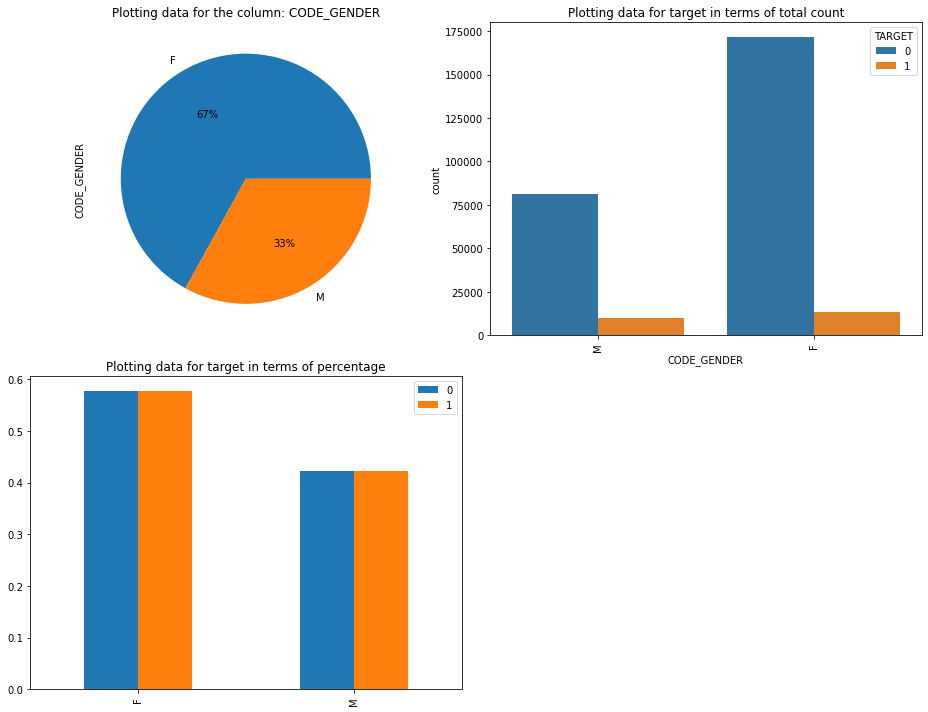

Plotting  FLAG_OWN_REALTY


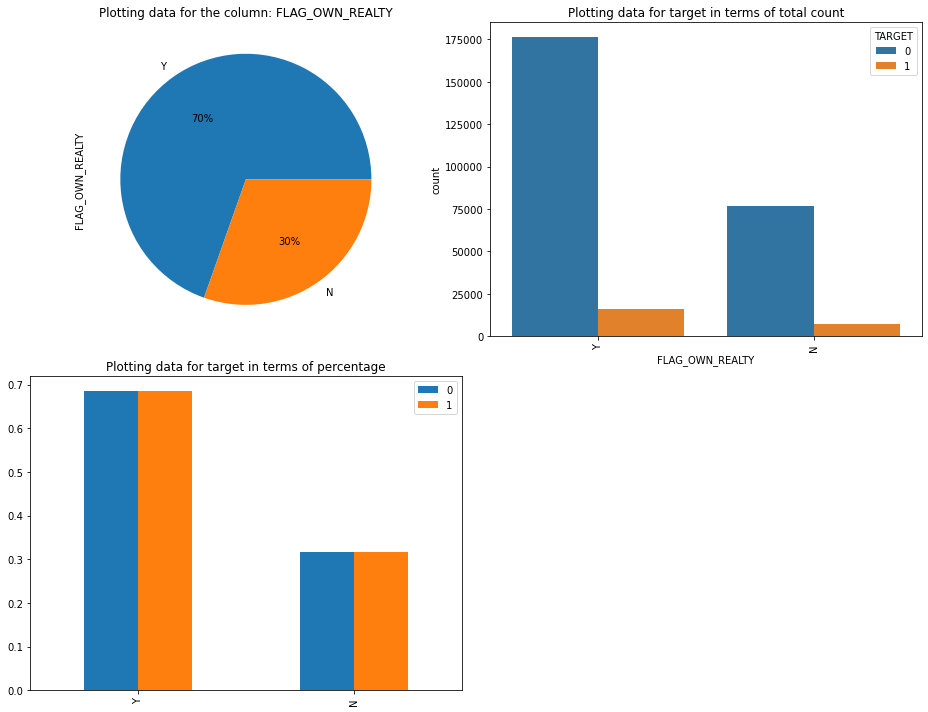

Plotting  NAME_INCOME_TYPE


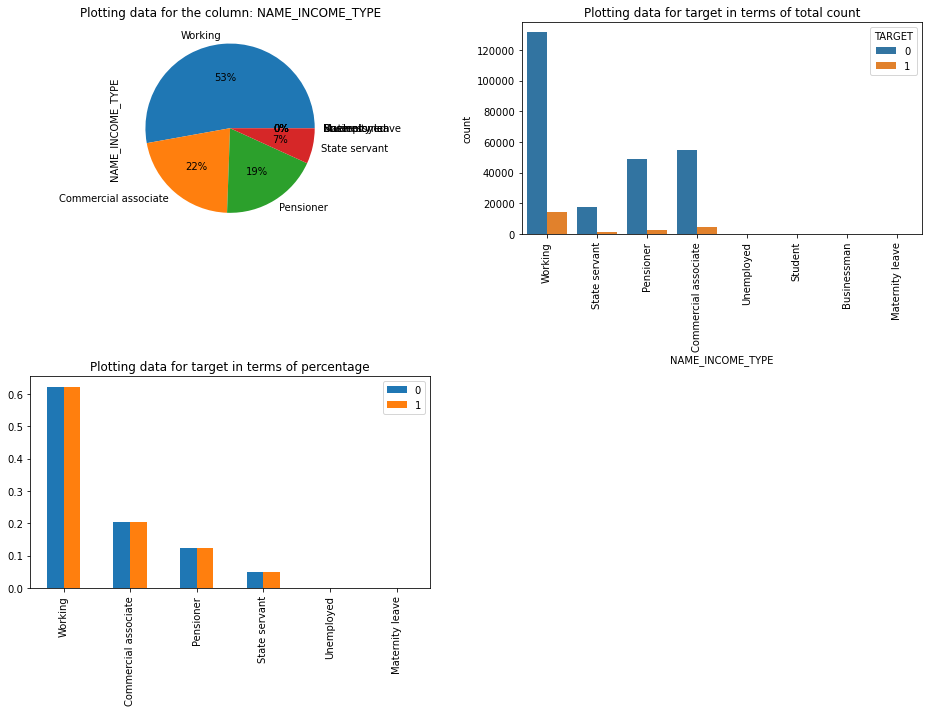

Plotting  NAME_HOUSING_TYPE


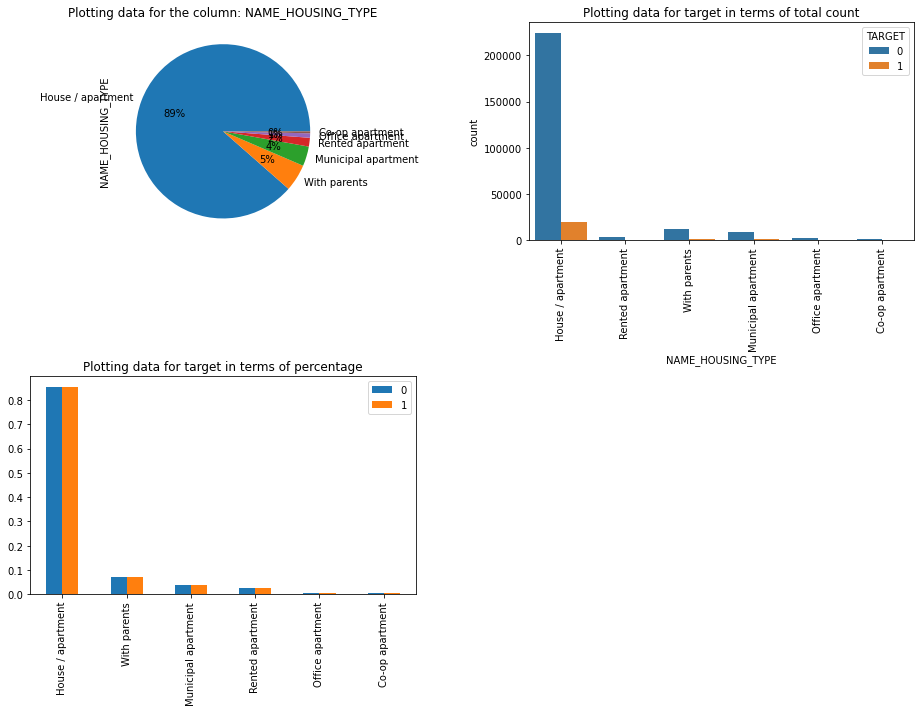

In [80]:
for column in categorical_columns:
    print("Plotting ",column)
    plotting(current_app_data, current_target_0, current_target_1, column)
    print("=======================================================")

## Analysis

### Univariate analysis

#### Count of defaulters and non-defaulters on the basis of gender

[Text(0.5, 0, 'Gender')]

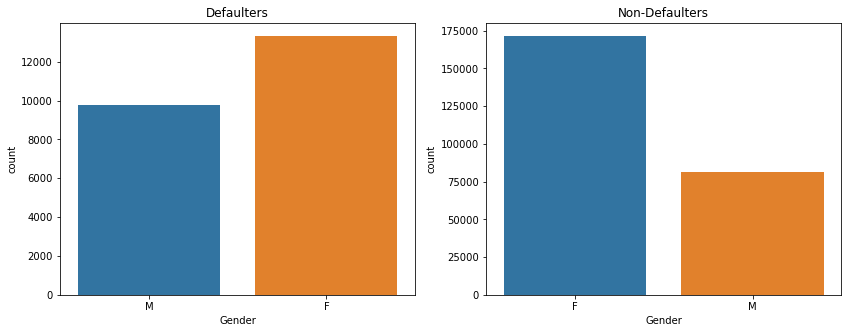

In [81]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

-  **Defaluters** - We can see that females are slightly more in number of defaulters than male.
- **Non-defaluters** - The same pattern continues for non-defaluters as well. The females are more in number here than male.

#### Defaulters and non-defaulters on the basis of Loan type

[Text(0.5, 0, 'Loan type')]

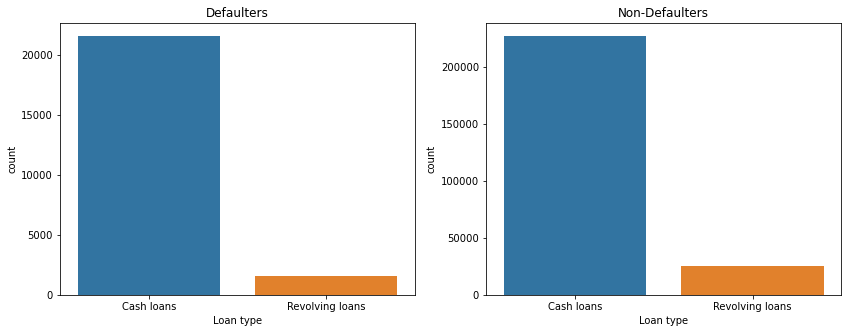

In [82]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

- We see in both the cases that Revolving loans are very less in number compared to Cash loans.

#### Defaulters and non-defaulters on the basis of Income type

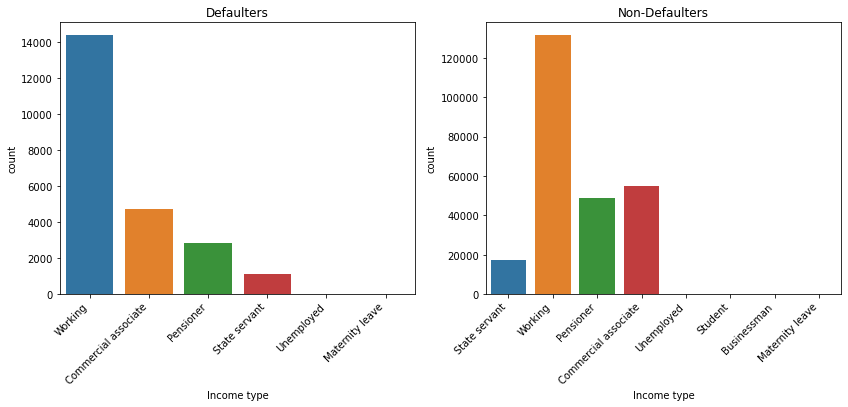

In [83]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

-  **Defaulters** - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
- **Non-defaulters** - Similarly here also working people are more in number who are not defaulted.

#### Defaulters and non-defaulters on the basis of Education type

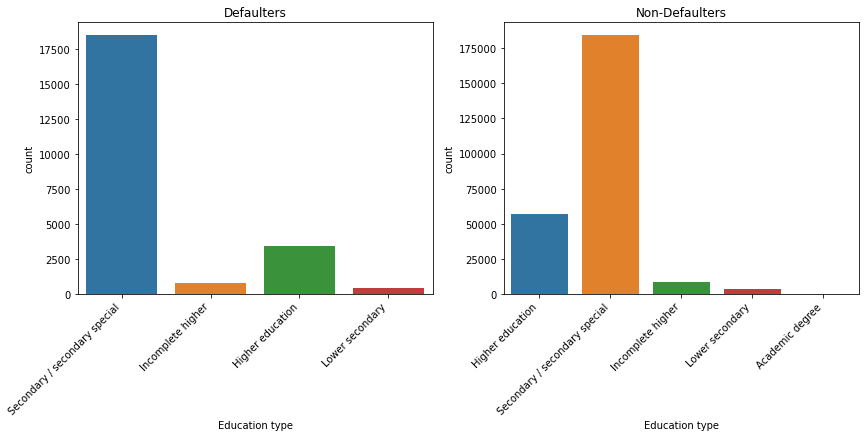

In [84]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

- **Defaulters** - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of eduacted poeple.
- **Non defaulters** - Here also Secondary/Secondary sepcial are more in numbers.

#### Defaulters and non-defaulters on the basis of Family status

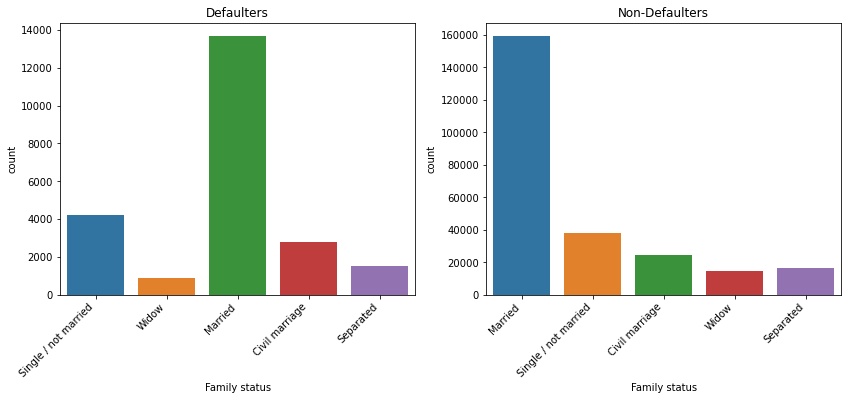

In [85]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

- For both the customers (defaulters and non-defaulters) married people are more in number comapred with single, separated, widow etc.

#### Defaulters and non-defaulters on the basis of credit amount of the loan

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

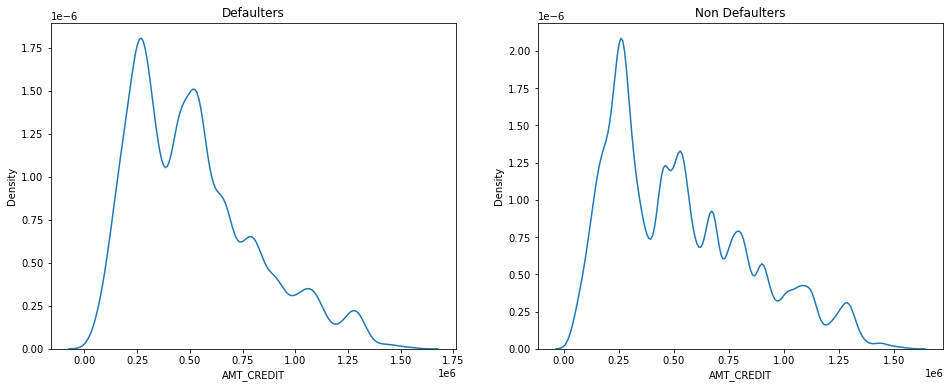

In [86]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(current_target_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(current_target_0['AMT_CREDIT'],hist=False)

- **Defaulters** - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.
- **Non defaulters** - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

#### Defaulters and non-defaulters on the basis of gender and their total income

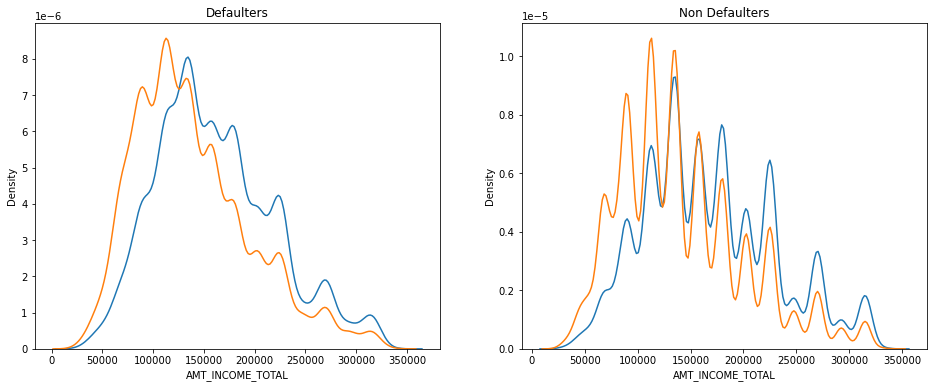

In [87]:
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = current_target_1[current_target_1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    
plt.subplot(1,2,2) 
plt.title('Non Defaulters')
for i in gender:
    subset = current_target_0[current_target_0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    

- **Defaulters** - We can notice by looking at the pattern that for being a defaulter both the genders (male and female) are almost equal in all income levels. The spike of being defaulters is from 50000 to 200000.
- **Non defaulters** - Here we see an interesting pattern. Females are more non defaulter on the lower income level but lesser non defaluter in higher income level. The spike is more for both the genders from 75000 to 150000.

#### Defaulters and non-defaulters on the basis of Loan annuity

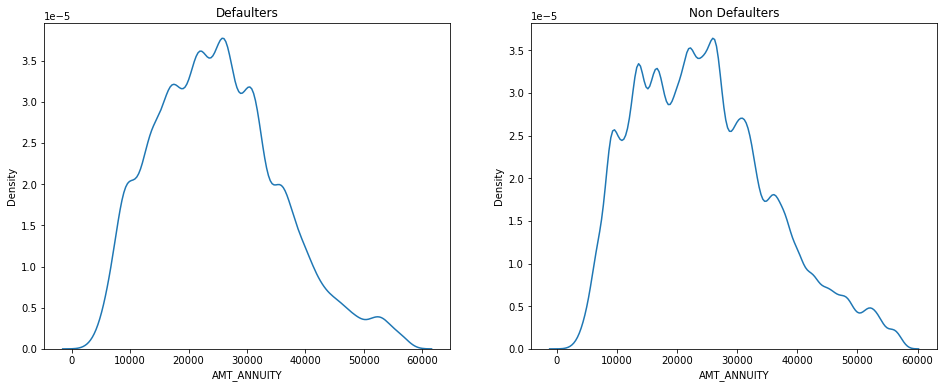

In [88]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(current_target_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(current_target_0['AMT_ANNUITY'],hist=False)
plt.show()

- We can notice from the above distribution plot that in both the cases the loan annuity is concentrated more from 10000 to 40000. 

#### Percentage of age group applicants defaulted and not defaulted
The analysis below showed that the how much percentage of each age group(Young, Mid age and Senior citizen) applicants are defaulted and not defaulted.

In [89]:
# Taking the percentage of each age group who was defaulted.
# Divide each defaulted age group count by total count of that age group
young_1 = round(100*len(current_app_data[(current_app_data['AGE_GROUP'] == 'Young') & (current_app_data['TARGET'] == 1)])/len(current_app_data[current_app_data['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(current_app_data[(current_app_data['AGE_GROUP'] == 'Mid Age') & (current_app_data['TARGET'] == 1)])/len(current_app_data[current_app_data['AGE_GROUP'] == 'Mid Age']),2)
senior_1 = round(100*len(current_app_data[(current_app_data['AGE_GROUP'] == 'Senior') & (current_app_data['TARGET'] == 1)])/len(current_app_data[current_app_data['AGE_GROUP'] == 'Senior']),2)

In [90]:
# Creating a dataframe of the defaulted age group percentage
agegroup_default = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_1, midage_1, senior_1]} 
agegroup_default = pd.DataFrame(agegroup_default) 
agegroup_default

,AGE_GROUP,Percentage
0,Young,10.79
1,Mid Age,7.37
2,Senior,5.08


In [91]:
# Taking the percentage of each age group who was not defaulted.
# Divide each non defaulted age group count by total count of that age group
young_0 = round(100*len(current_app_data[(current_app_data['AGE_GROUP'] == 'Young') & (current_app_data['TARGET'] == 0)])/len(current_app_data[current_app_data['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(current_app_data[(current_app_data['AGE_GROUP'] == 'Mid Age') & (current_app_data['TARGET'] == 0)])/len(current_app_data[current_app_data['AGE_GROUP'] == 'Mid Age']),2)
senior_0 = round(100*len(current_app_data[(current_app_data['AGE_GROUP'] == 'Senior') & (current_app_data['TARGET'] == 0)])/len(current_app_data[current_app_data['AGE_GROUP'] == 'Senior']),2)

In [92]:
# Creating a dataframe of the non defaulted age group percentage
agegroup_nondefault = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_0, midage_0, senior_0]} 
agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
agegroup_nondefault

,AGE_GROUP,Percentage
0,Young,89.21
1,Mid Age,92.63
2,Senior,94.92


Text(0.5, 1.0, 'Non-Defaulters')

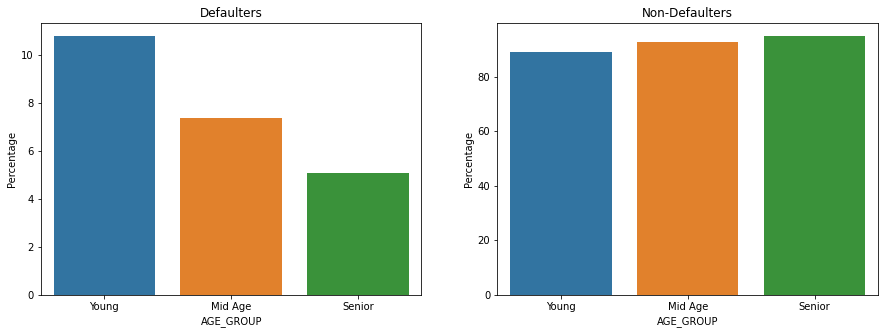

In [93]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup_default)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup_nondefault)
plt.title('Non-Defaulters')

- **Defaulters** - We see that Young people are more likely to default than other two age groups. Whereas, Senior citizens are less likely to default than others.
- **Non defaulters** - There is not much difference in the likelihood for non defaulters in the age groups.

#### Income group

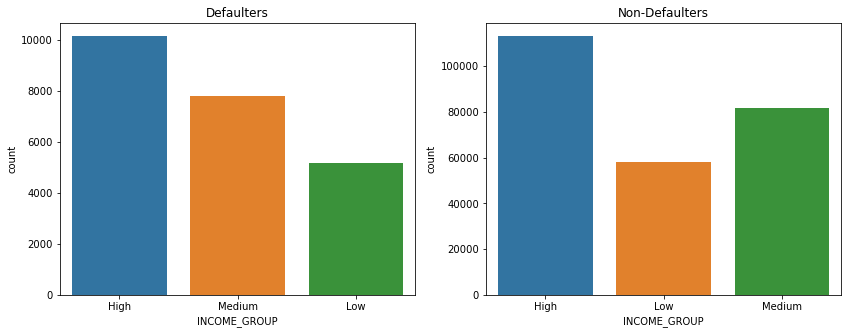

In [94]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=current_target_0)
plt.title('Non-Defaulters')
plt.show()

- **Defaulters** - Surprisingly the High income group is more in number to be defaulted, then Medium and then Low.
- **Non defaulters** - Here as expected the count of non defaulters more in High income group and less in low income group.

## Bivariate analysis

#### Corelation of relevant numerical columns for defaulters and non defaulters

In [95]:
# Listing the relevant columns for finding corelation
corelation_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']

##### Corelation of defaulters 

In [96]:
# Creating dataframe for numerical columns
corelation_cols_target_1 = current_target_1[corelation_cols]
corelation_cols_target_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
0,202500.0,406597.5,24700.5,351000.0,26,0.20,2
26,112500.0,979992.0,27076.5,702000.0,52,0.37,3
40,202500.0,1193580.0,35028.0,855000.0,48,0.31,2
42,135000.0,288873.0,16258.5,238500.0,37,0.54,3
81,81000.0,252000.0,14593.5,252000.0,68,0.37,2


In [97]:
# Corelation matrix
corelation_cols_target_1.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.300536,0.379973,0.300847,-0.017733,0.032894,-0.141908
AMT_CREDIT,0.300536,1.000000,0.743835,0.978326,0.134223,0.101060,-0.037249
AMT_ANNUITY,0.379973,0.743835,1.000000,0.741417,0.002448,0.080166,-0.043304
AMT_GOODS_PRICE,0.300847,0.978326,0.741417,1.000000,0.135488,0.109665,-0.045769
AGE,-0.017733,0.134223,0.002448,0.135488,1.000000,0.166840,-0.035831
EXT_SOURCE_SCORE,0.032894,0.101060,0.080166,0.109665,0.166840,1.000000,-0.168471
REGION_RATING_CLIENT,-0.141908,-0.037249,-0.043304,-0.045769,-0.035831,-0.168471,1.000000


<AxesSubplot:>

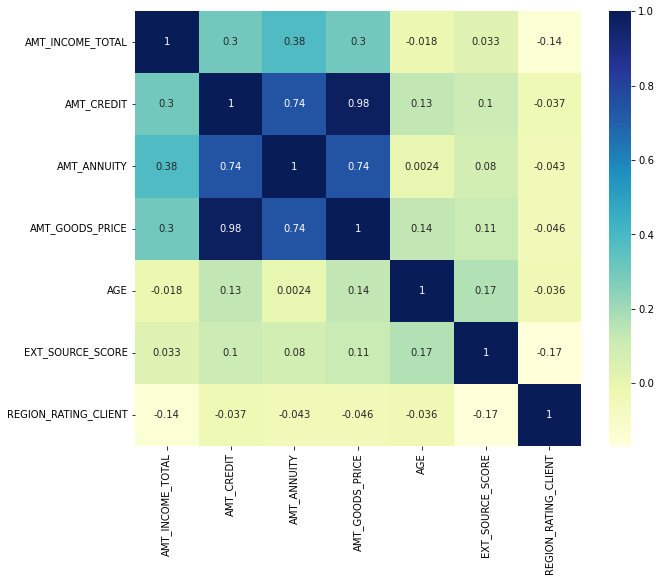

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(corelation_cols_target_1.corr(),cmap="YlGnBu",annot=True)

**co-relate columns for defaulters**
-  AMT_CREDIT and AMT_ANNUITY (0.74)
-  AMT_CREDIT and AMT_GOODS_PRICE (0.98)
-  AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

##### Corelation of non defaulters 

In [99]:
# Creating dataframe for numerical columns
corelation_cols_target_0 = current_target_1[corelation_cols]
corelation_cols_target_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
0,202500.0,406597.5,24700.5,351000.0,26,0.20,2
26,112500.0,979992.0,27076.5,702000.0,52,0.37,3
40,202500.0,1193580.0,35028.0,855000.0,48,0.31,2
42,135000.0,288873.0,16258.5,238500.0,37,0.54,3
81,81000.0,252000.0,14593.5,252000.0,68,0.37,2


In [100]:
# Corelation matrix
corelation_cols_target_0.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.300536,0.379973,0.300847,-0.017733,0.032894,-0.141908
AMT_CREDIT,0.300536,1.000000,0.743835,0.978326,0.134223,0.101060,-0.037249
AMT_ANNUITY,0.379973,0.743835,1.000000,0.741417,0.002448,0.080166,-0.043304
AMT_GOODS_PRICE,0.300847,0.978326,0.741417,1.000000,0.135488,0.109665,-0.045769
AGE,-0.017733,0.134223,0.002448,0.135488,1.000000,0.166840,-0.035831
EXT_SOURCE_SCORE,0.032894,0.101060,0.080166,0.109665,0.166840,1.000000,-0.168471
REGION_RATING_CLIENT,-0.141908,-0.037249,-0.043304,-0.045769,-0.035831,-0.168471,1.000000


<AxesSubplot:>

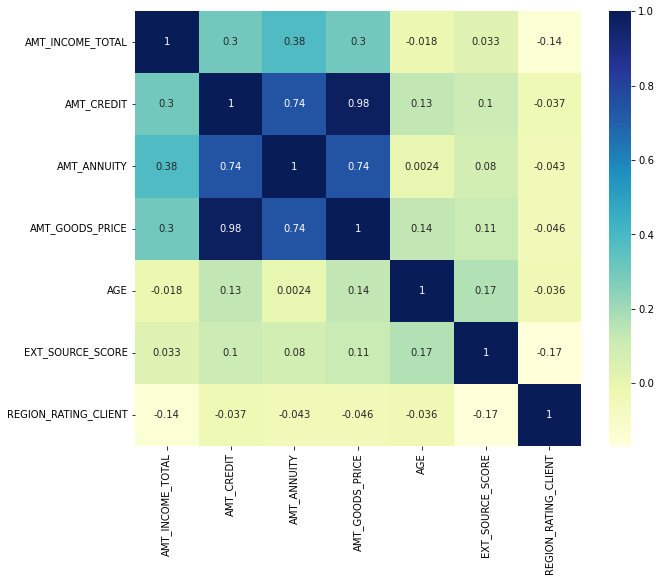

In [101]:
plt.figure(figsize=(10,8))
sns.heatmap(corelation_cols_target_0.corr(),cmap="YlGnBu",annot=True)

**co-relate columns for non defaulters**
- AMT_CREDIT and AMT_ANNUITY (0.76)
- AMT_CREDIT and AMT_GOODS_PRICE (0.98)
- AMT_ANNUITY and AMT_GOODS_PRICE (0.76)

**Conclusion** - 
We can see that for both defaulters and non defaulters the same pairs of columns are highly corelated.

### Bivariate analysis

#### Credit amount of the loan on the basis of client income for both male and female

Text(0.5, 1.0, 'Non Defaulters')

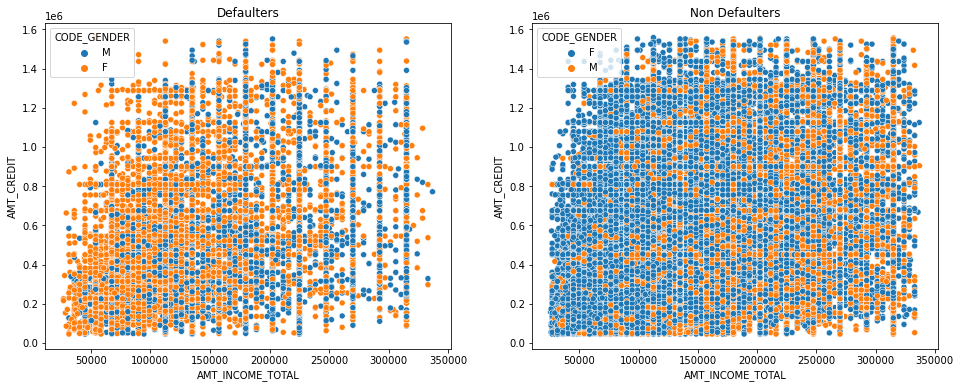

In [102]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=current_target_0)
plt.title('Non Defaulters')

- **Defaulters** - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
- **Non defaulters** - We can hardly figure out any pattern out of this.

#### Credit amount of the loan of various categories

In [103]:
# Category list
categorical_columns

['AGE_GROUP',
 'NAME_EDUCATION_TYPE',
 'INCOME_GROUP',
 'NAME_FAMILY_STATUS',
 'CREDIT_GROUP',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'EXT_SCORE_CATEGORY',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE']

#### Defaulters

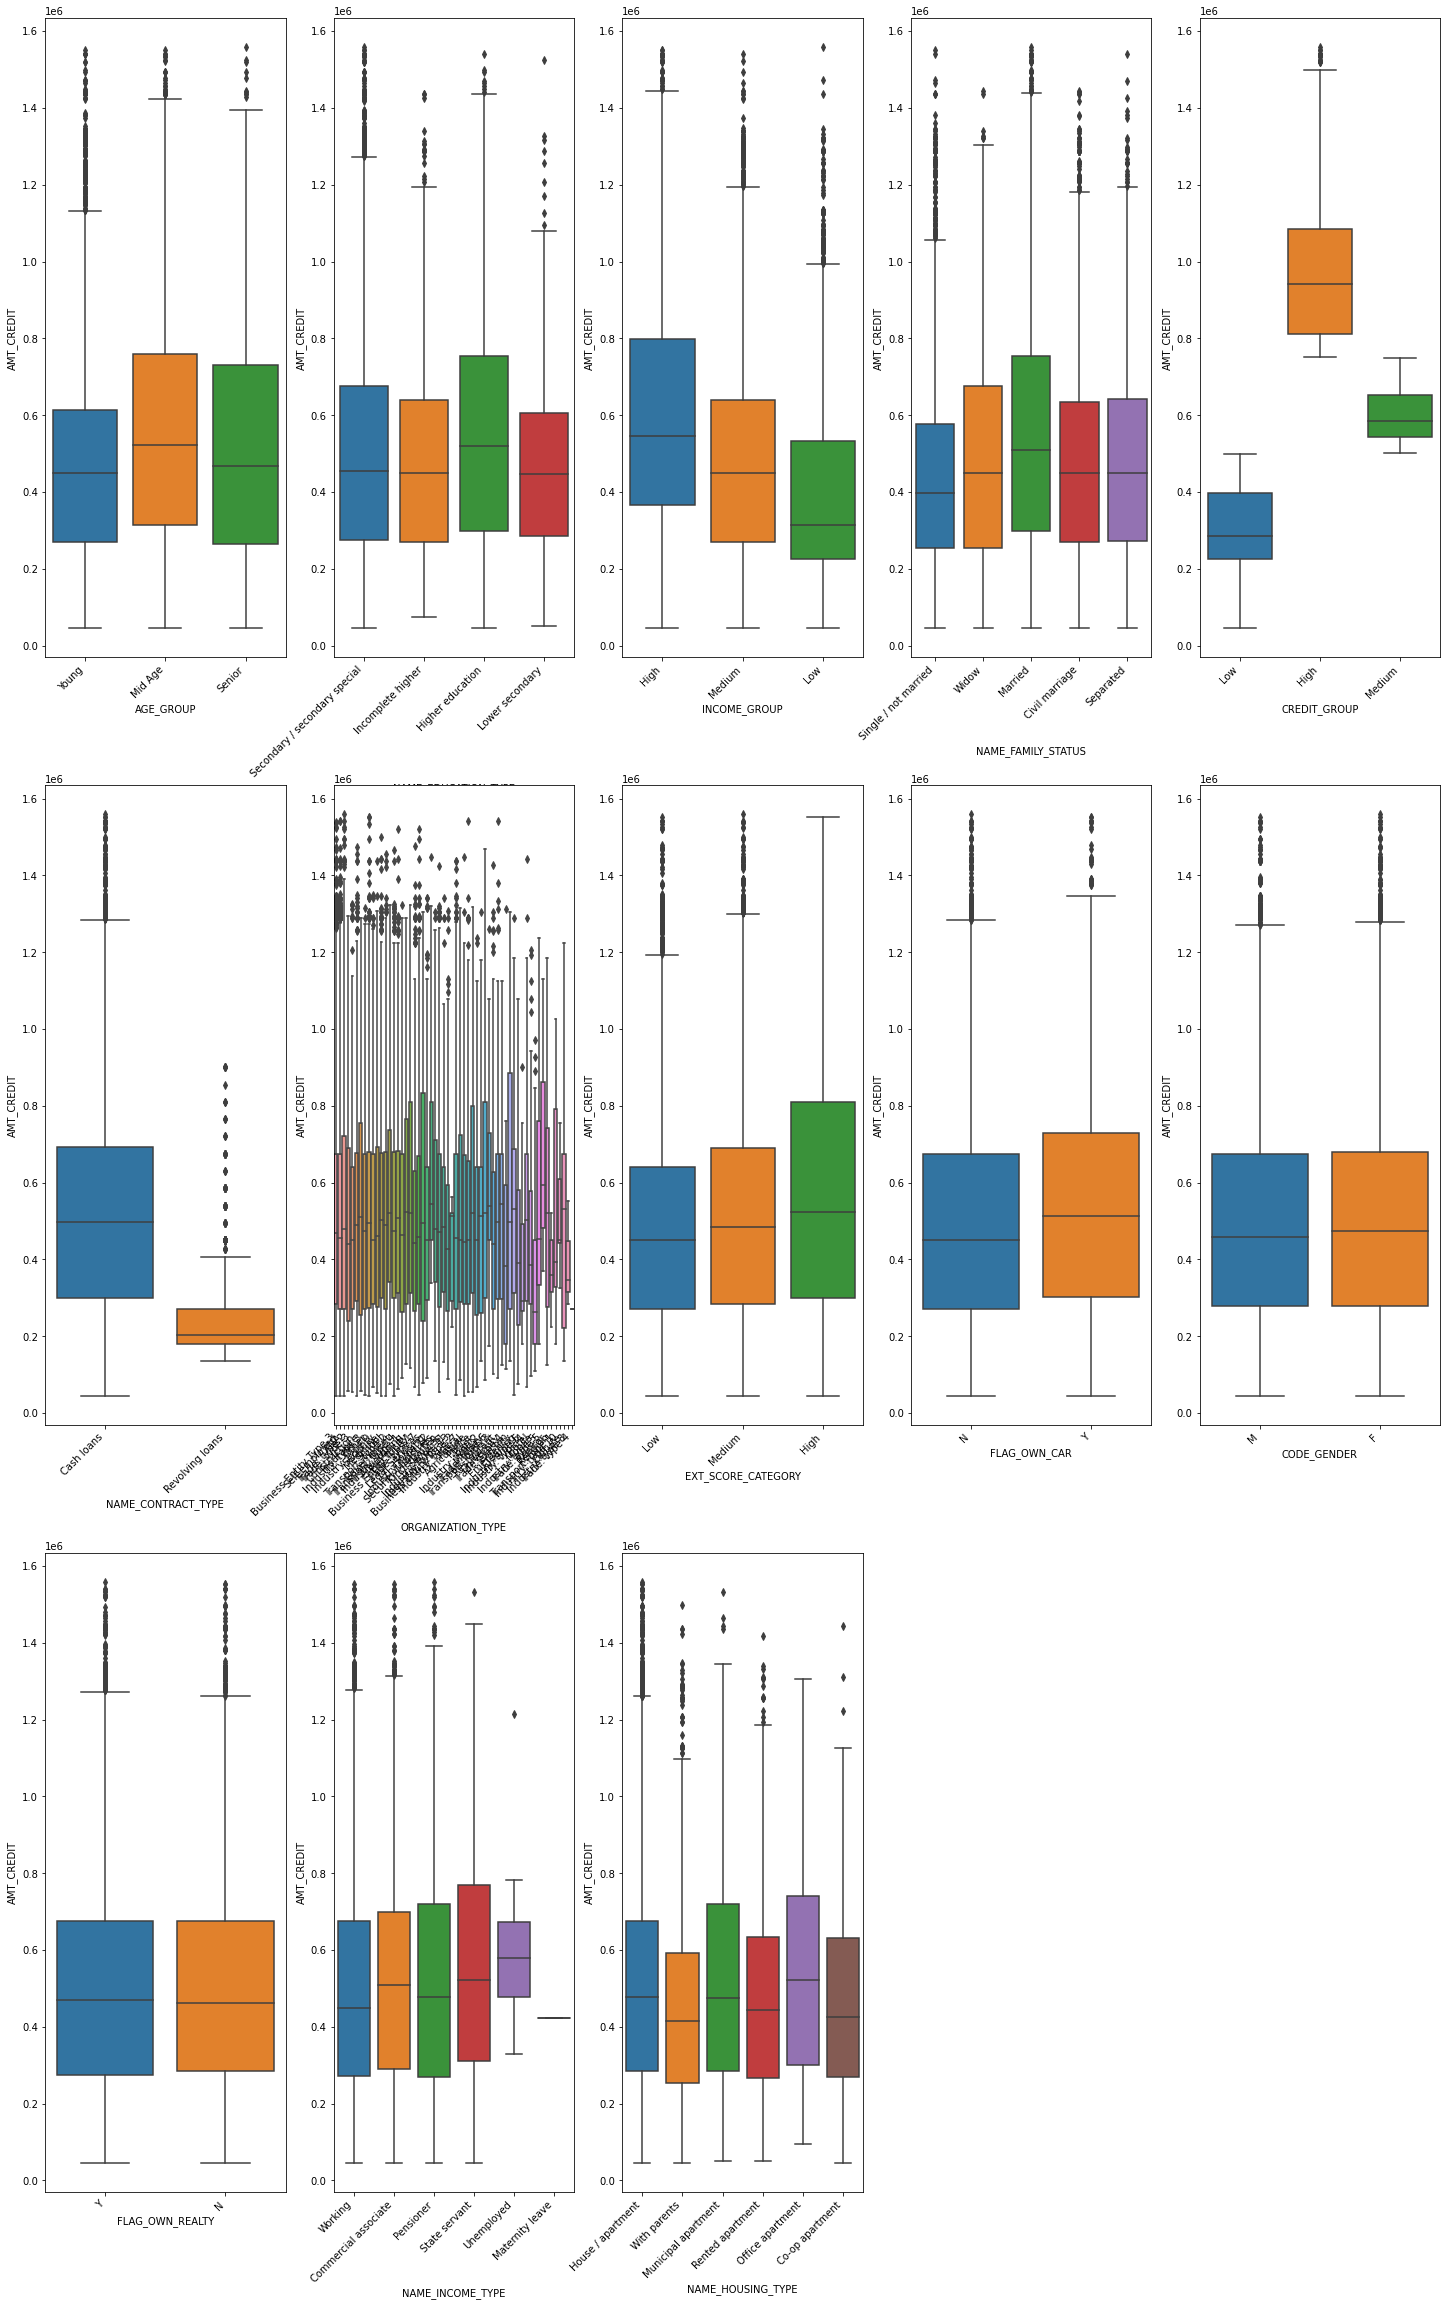

In [104]:
plt.figure(figsize=(25,40))
k=0
for category in categorical_columns:
    k = k+1
    ax = plt.subplot(3,5,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=current_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

-  Credit amount of the loans are very low for `Revolving loans`
-  There is no credit amount differnce between genders, client owning cars or realty.
-  The Young age group got less amount of loan credited cmpared to mid age and senior citizen.
-  Higher income group have more loan amount credited.
-  Clients having higher external score have more loan amount.

#### Non-defaulters

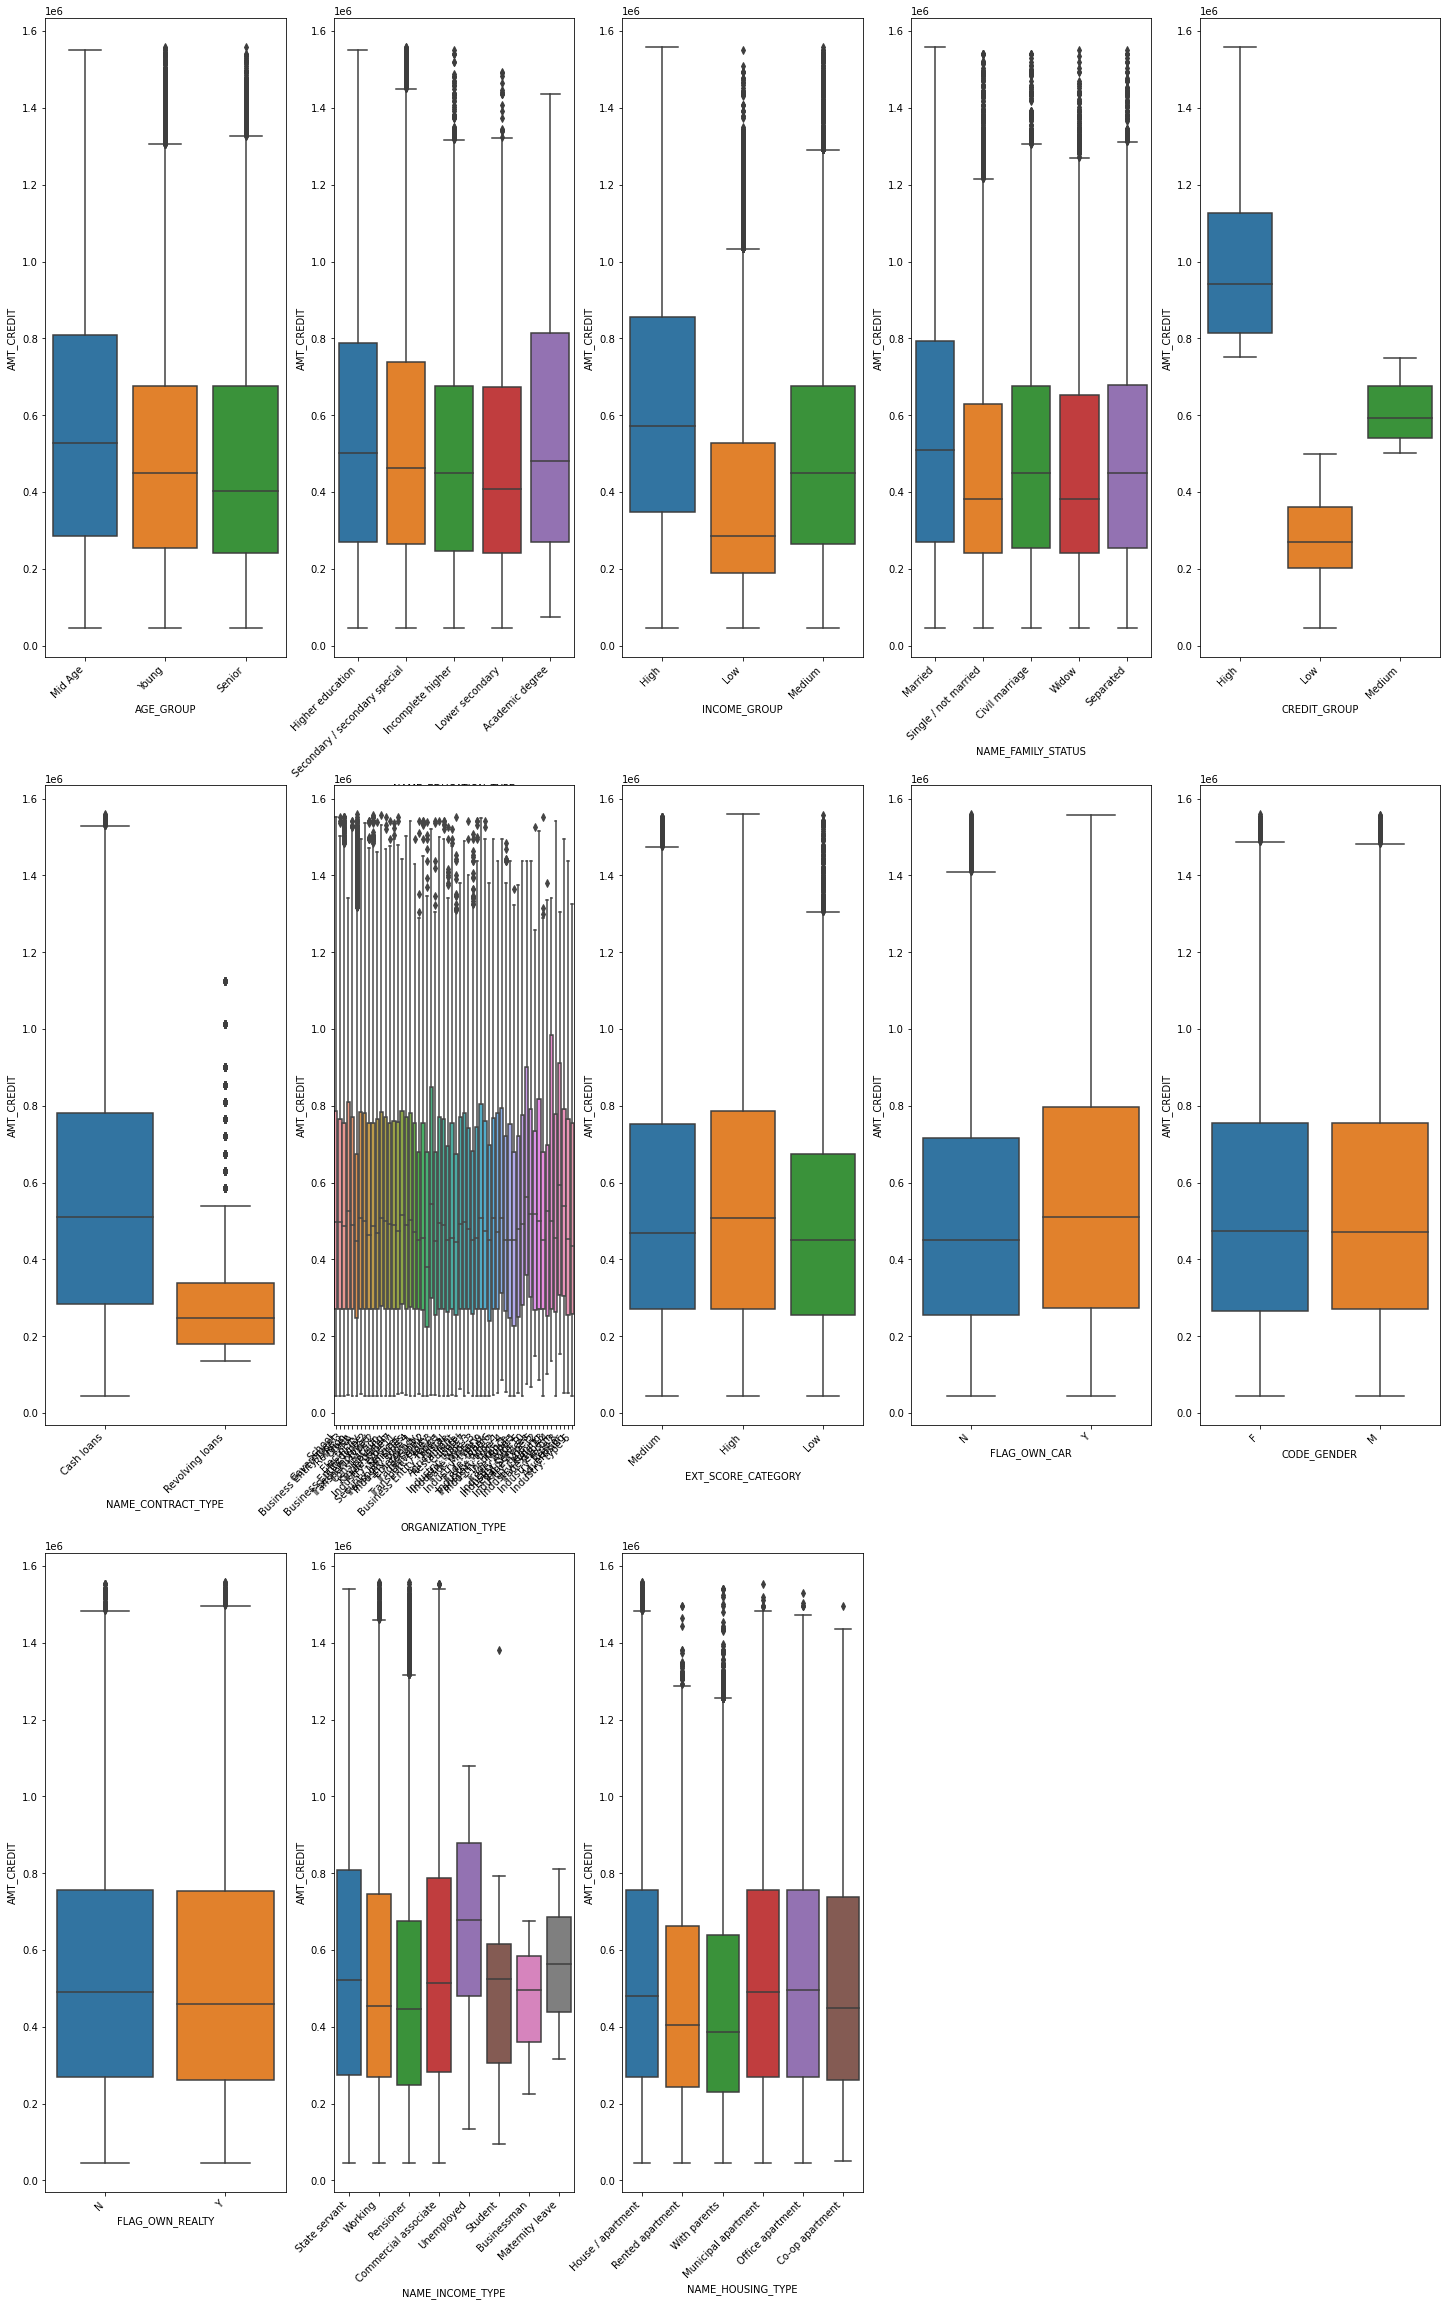

In [105]:
plt.figure(figsize=(25,40))
k=0
for category in categorical_columns:
    k = k+1
    ax = plt.subplot(3,5,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=current_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

- Credit amount of the loans are very low for `Revolving loans`
- There is no credit amount differnce between genders, client owning cars or realty.
- The mid age group got more amount of loan credited cmpared to young and senior citizen.
- Higher income group have more loan amount credited and lower the lowest.
- Clients having higher external score have more loan amount.
- Surprisingly the `unemployed` people have spike in credit amount of loan
- The `Married` people have more loan amount credited.

### Anslysis of two segmented variables 

 #### Income group and gender

Text(0, 0.5, 'Defaulters')

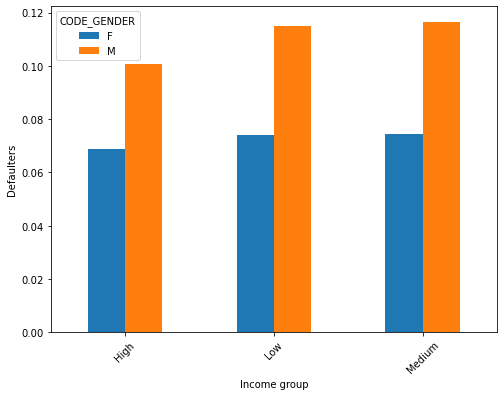

In [106]:
# Note - The aggfunc argument of pivot_table takes a function or list of functions but not dict.
current_app_data.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')

- We can see that `Males` are more likely defaulted than `Females` accross all income groups.

#### Education and gender

Text(0, 0.5, 'Defaulters')

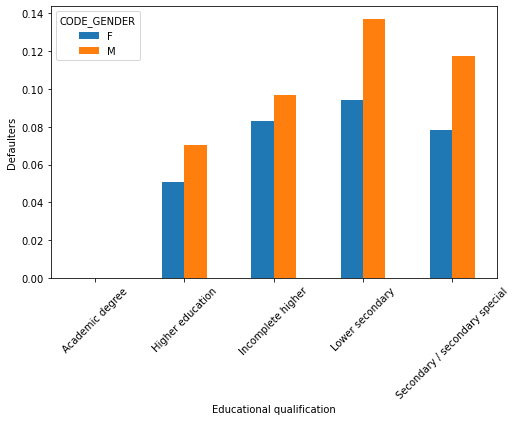

In [107]:
current_app_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

-  `Lower secondary` educated clients are more defaulted followed by `Secondary` and `Incomplete higher` educated clients.
-  The `Higher` educated people are less defaulted.
- Accross all educated level `Females` are less defaulted than male.

 #### Credit amount group and Income group

Text(0, 0.5, 'Defaulters')

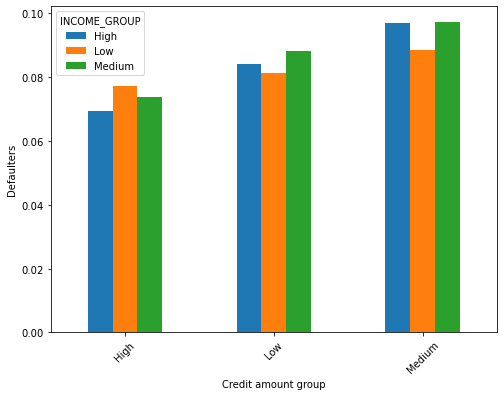

In [108]:
current_app_data.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

-  Medium credit amount group are highly defaulted in all income groups.
-  High credit amount groups are less likely to default in all income groups.

#### Credit amount group and Age group

Text(0, 0.5, 'Defaulters')

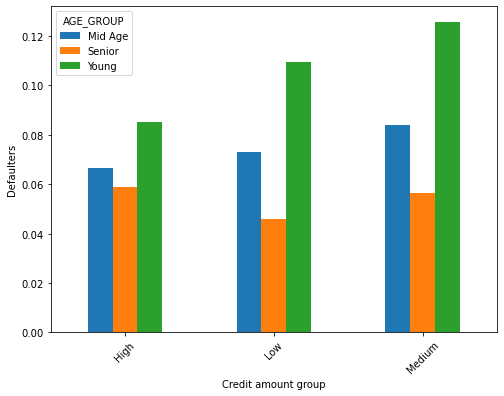

In [109]:
current_app_data.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

-  Young clients with medium and low credit amount group are highly defaulted.
-  Senior citizens across all credit amount groups are less likely defaulted.

#### Age group and Income group

Text(0, 0.5, 'Defaulters')

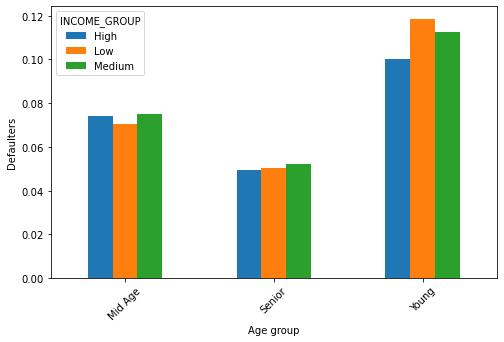

In [110]:
current_app_data.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')

- Young clients are more defaulted than Mid age and senior.
-  Young low income people are more defaulted.
-  For Mid age and senior people the default rate is almost same in all income group.

#### Profession and Gender

Text(0, 0.5, 'Defaulters')

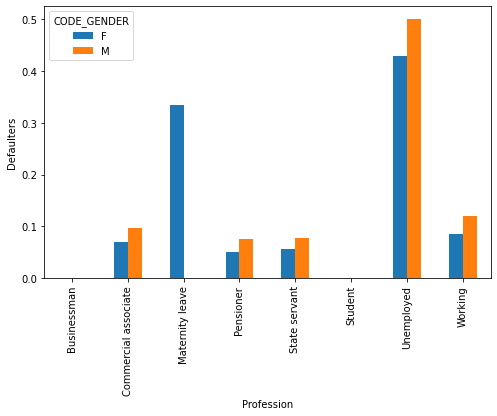

In [111]:
current_app_data.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

-  the unemployed clients are more defaulted.
-  Clients with maternity leave are expected to be defaulted more.
-  The default rate is lesser in all other professions.
-  Males are more defaulted with their respective professions compared to females.

#### Family status and age group

Text(0, 0.5, 'Defaulters')

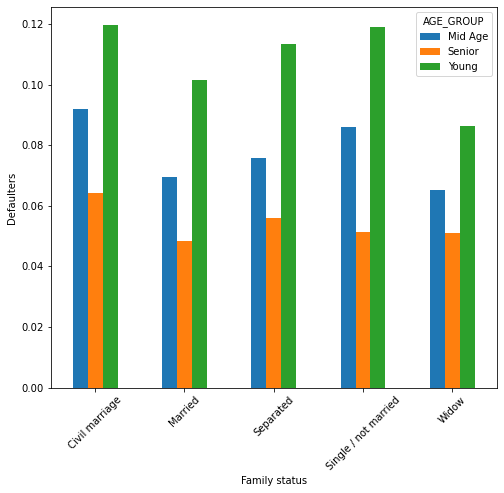

In [112]:
current_app_data.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

- Across all family status the `Young` clients are more defaulted and `Senior citizen` are less.

#### Family status and gender

Text(0, 0.5, 'Defaulters')

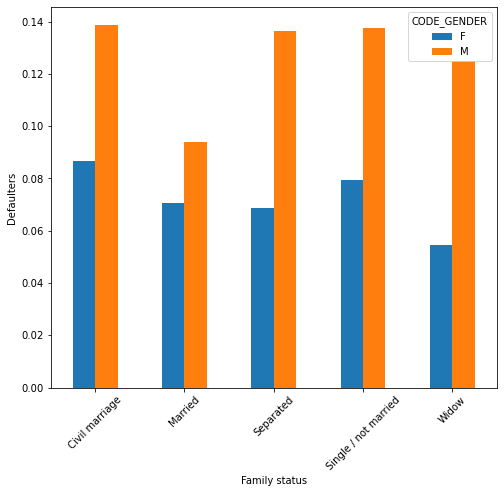

In [113]:
current_app_data.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

- Across all family status the `Male` clients are more defaulted than `Female`.

## Previous DataSet - previous_application.csv

In [114]:
previous_app_data= pd.read_csv('previous_application.csv')
previous_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
previous_app_data.shape

(1670214, 37)

In [116]:
previous_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [117]:
previous_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Handaling missing values in columns

**Replacing all the XNA and XAP to np.null**
Because looks like these values entered in the application as blank or may be not applicable.

In [118]:
previous_app_data.replace('XNA',np.nan,inplace=True)
previous_app_data.replace('XAP',np.nan,inplace=True)

#### Analyse and delete the columns which have more than 30% missing values

In [119]:
# get the number of rows and column in dataset
previous_app_data.shape

(1670214, 37)

In [120]:
# Calculate 30% of rows
x = len(previous_app_data)*.30
x

501064.19999999995

In [121]:
# if a column contains more than 30% of its values missing, delete that column

previous_app_data_missing_values = (previous_app_data.columns[previous_app_data.isnull().sum() >= x]).tolist()
previous_app_data_missing_values

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [122]:
# Count the number of missing values column
len(previous_app_data_missing_values)

18

####  Delete the columns having more than 30% missing values

In [123]:
# axis: It determines the axis to remove. Set it to 1 or column to remove columns containing missing values.
# By default, it removes rows with NA from DataFrame.
previous_app_data = previous_app_data.drop(previous_app_data_missing_values,axis=1)

In [124]:
previous_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

In [125]:

previous_app_data.shape

(1670214, 19)

In [126]:
# List the columns having more than 30% missing values
columns_30_percent_missing_values = (previous_app_data.columns[(round(100*(previous_app_data.isnull().sum()/len(previous_app_data.index)), 2)) >= 30]).tolist()
columns_30_percent_missing_values

[]

In [127]:
# Delete the columns having more than 30% missing values
previous_app_data = previous_app_data.drop(columns_30_percent_missing_values,axis=1)

In [128]:
# get the number of rows and column in dataset
previous_app_data.shape

(1670214, 19)

##### List and delete the columns, which are not much relevant for the analysis

In [129]:
previous_app_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [130]:
irrelevant_columns = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [131]:
# Delete the columns which are irrelevant for the analysis
previous_app_data = previous_app_data.drop(irrelevant_columns,axis=1)

In [132]:
previous_app_data.shape

(1670214, 15)

#### Treating Missing Values in Rows

In [133]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(previous_app_data[previous_app_data.isnull().sum(axis=1) > (len(previous_app_data.columns)//2)].index)

0

In [134]:
# Percent of missing values in columns
(round(100*(previous_app_data.isnull().sum()/len(previous_app_data.index)),2))

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_TYPE       0.02
AMT_ANNUITY             22.29
AMT_APPLICATION          0.00
AMT_CREDIT               0.00
AMT_GOODS_PRICE         23.08
NAME_CONTRACT_STATUS     0.00
DAYS_DECISION            0.00
NAME_CLIENT_TYPE         0.12
NAME_PORTFOLIO          22.29
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
CNT_PAYMENT             22.29
PRODUCT_COMBINATION      0.02
dtype: float64

In [135]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(previous_app_data[np.isnan(previous_app_data['AMT_ANNUITY']) & np.isnan(previous_app_data['CNT_PAYMENT']) & np.isnan(previous_app_data['AMT_GOODS_PRICE'])])

333855

- there are only 333855 such records we can delete those.
- Since we have total 1670214 records deleting only 333855 records will not much affect our further analysis.
- It is better to delete such rows instead of imputing values and making the analysis biased.

In [136]:
previous_app_data = previous_app_data[(~(np.isnan(previous_app_data['AMT_ANNUITY']) & np.isnan(previous_app_data['AMT_GOODS_PRICE']) & np.isnan(previous_app_data['CNT_PAYMENT'])))]

In [137]:
previous_app_data.shape

(1336359, 15)

In [138]:
(round(100*(previous_app_data.isnull().sum()/len(previous_app_data.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             2.87
PRODUCT_COMBINATION     0.00
dtype: float64

In [139]:
# Count the rows for which AMT_ANNUITY is empty
len(previous_app_data[np.isnan(previous_app_data['AMT_ANNUITY'])])

38380

In [140]:
# As there are only 38380 rows we can delte those records
previous_app_data = previous_app_data[~(np.isnan(previous_app_data['AMT_ANNUITY']))]

In [141]:
previous_app_data.shape

(1297979, 15)

In [142]:
(round(100*(previous_app_data.isnull().sum()/len(previous_app_data.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [143]:
previous_app_data.shape

(1297979, 15)

### Removing outliers

In [144]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
column_list_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for col in column_list_outlier: 
    q1 = previous_app_data[col].quantile(0.25)
    q3 = previous_app_data[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    application_previous = previous_app_data.loc[(previous_app_data[col] > range_low) & (previous_app_data[col] < range_high)]

application_previous.shape

(1242076, 15)

In [145]:
# Percentage of rows lost
round((100 - 100*(len(application_previous.index)/1670214)),2)

25.63

- In our data cleaning excerise we have lost around `25%` rows. As this is huge dataset, we still have 1242076 records for analysis.

### Checking data imbalance

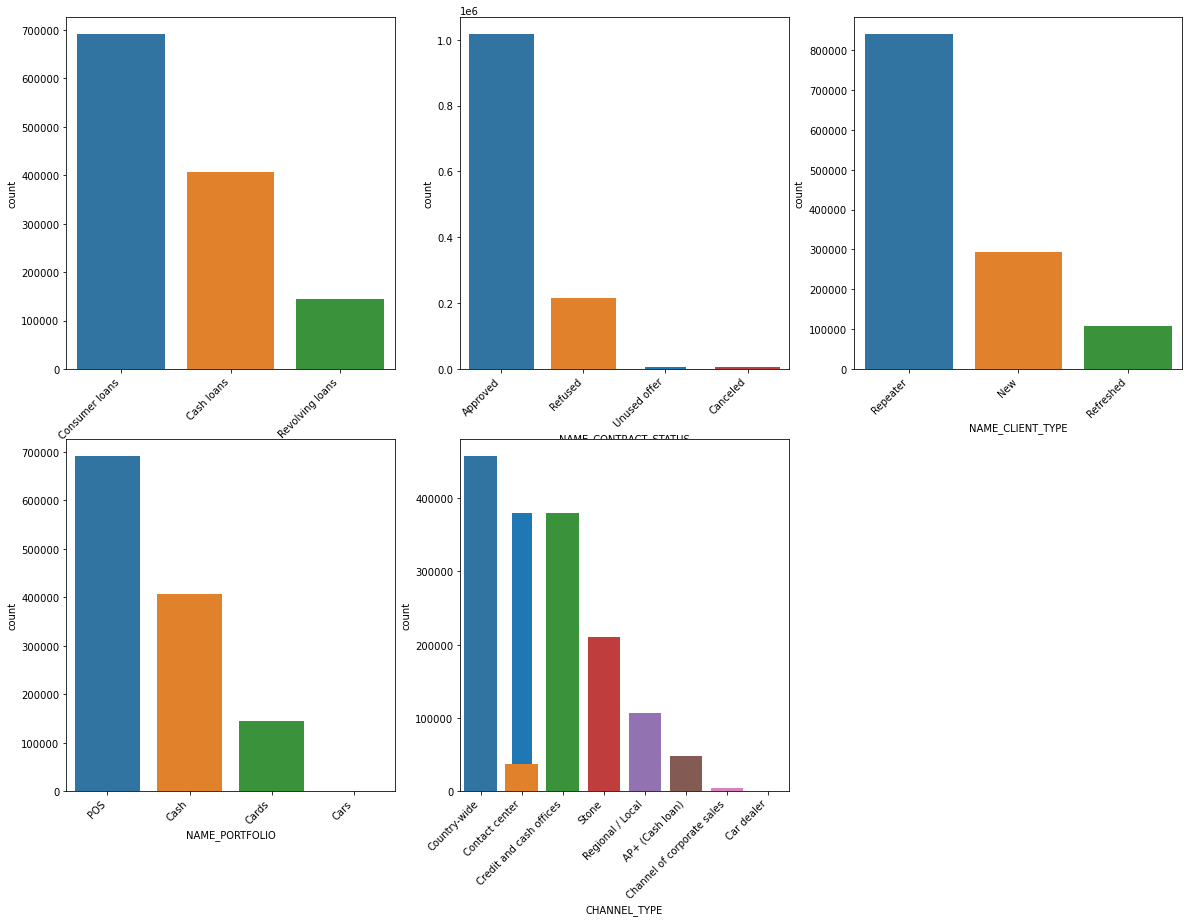

In [147]:
# Listing columns for check data imbalance and plotting them
columns_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in columns_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    application_previous[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = application_previous )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

We can see that there is data imbalance in below columns:-
-  NAME_CONTRACT_TYPE - There are veru few `Revolving Loans`
-  NAME_CONTRACT_STATUS - There are very few `Refused` loans. Almost negligible `Canceled` loans.
-  NAME_CLIENT_TYPE - There are very few `New` applicant. Even fewer `Refreshed` applicants.
-  NAME_PORTFOLIO - Very few application for Cards and Cars
-  CHANNEL_TYPE - Except `Country-Wide`, `Credit and Cash offices` and `Stone` all other channels are very few in muber.

#### Converting `DAYS_DECISION` column into `MONTH_DECISION` column for readablity and analysis

In [148]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
application_previous['MONTH_DECISION'] = abs(application_previous['DAYS_DECISION']//30)

In [149]:
# Drop 'DAYS_DECISION' column
application_previous = application_previous.drop(['DAYS_DECISION'],axis=1)

In [150]:
application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,Repeater,POS,Country-wide,35,12.0,POS mobile with interest,3
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved,Repeater,Cash,Contact center,-1,36.0,Cash X-Sell: low,6
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: high,11
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: middle,18
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused,Repeater,Cash,Credit and cash offices,-1,24.0,Cash Street: high,27


In [151]:
application_previous.shape

(1242076, 15)

### Merging Current application and Previous application dataset

In [152]:
# Columns to take from current application dataset
columns_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

In [153]:
# Creating a dataset from current application for merging 
data_current_to_merge = current_app_data[columns_current]
data_current_to_merge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,100002,1,M,Secondary / secondary special,Single / not married,Young,High,Low
1,100003,0,F,Higher education,Married,Mid Age,High,Medium
2,100004,0,M,Secondary / secondary special,Single / not married,Mid Age,Low,High
3,100006,0,F,Secondary / secondary special,Civil marriage,Mid Age,Medium,Medium
4,100007,0,M,Secondary / secondary special,Single / not married,Mid Age,Medium,Medium


In [154]:
# Columns to remove from previous application dataset
columns_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [155]:
# Creating  a dataset from previous application for merging
data_prev_to_merge = application_previous.drop(columns_prev_to_drop,axis=1)
data_prev_to_merge.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Repeater,Cash,Credit and cash offices,12.0,18
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27


In [156]:
# Merging both the datasets
dataframe_merged = pd.merge(data_prev_to_merge,data_current_to_merge, on='SK_ID_CURR', how='left')
dataframe_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0.0,F,Incomplete higher,Married,Mid Age,High,High
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6,0.0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,Medium
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,0.0,F,Secondary / secondary special,Married,Young,Low,Low
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Repeater,Cash,Credit and cash offices,12.0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27,0.0,F,Secondary / secondary special,Married,Young,High,Medium


In [157]:
dataframe_merged.shape

(1242076, 19)

In [158]:
len(dataframe_merged[np.isnan(dataframe_merged['TARGET'])])

286969

- We can see that there are NaN values in the current application columns in the merged datasets. Because few `SK_ID_CURR` are present in the previous application dataset, but those IDs are not present in the current application dataset.
Eg:- `SK_ID_CURR == 176158` is present in the previous application but not in present.
We will remove those such records.

In [159]:
dataframe_merged = dataframe_merged[(~(np.isnan(dataframe_merged['TARGET'])))]         

In [160]:
# Converting TARGET column from float64 to Int64
dataframe_merged['TARGET'] = dataframe_merged['TARGET'].astype('int64')

In [161]:
dataframe_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0,F,Incomplete higher,Married,Mid Age,High,High
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6,0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,Medium
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,0,F,Secondary / secondary special,Married,Young,Low,Low
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27,0,F,Secondary / secondary special,Married,Young,High,Medium
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,Approved,Repeater,Cash,Credit and cash offices,18.0,23,0,M,Secondary / secondary special,Civil marriage,Mid Age,High,Medium


We can create a new derived column for what percentage of the applied amount was credited for each client. 
Derived column name :- `PERCENT_CREDIT`

In [162]:
dataframe_merged['PERCENT_CREDIT'] = round(((dataframe_merged['AMT_CREDIT']/dataframe_merged['AMT_APPLICATION'])*100),2)
dataframe_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0,F,Incomplete higher,Married,Mid Age,High,High,100.00
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6,0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,Medium,111.88
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,0,F,Secondary / secondary special,Married,Young,Low,Low,121.28
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27,0,F,Secondary / secondary special,Married,Young,High,Medium,119.72
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,Approved,Repeater,Cash,Credit and cash offices,18.0,23,0,M,Secondary / secondary special,Civil marriage,Mid Age,High,Medium,108.12


### Univariate analysis

#### Previous Loan status

[Text(0.5, 0, 'Loan status')]

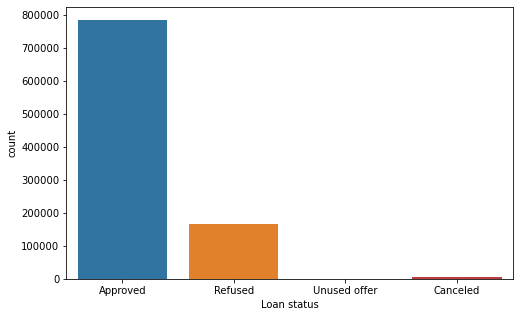

In [163]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=dataframe_merged)
ax.set(xlabel='Loan status')


- there are huge number of `Approved` loan than `Refused`. Hardly, there are any `Canceled` or `Unused offer` loan.

#### Client type

[Text(0.5, 0, 'Client type')]

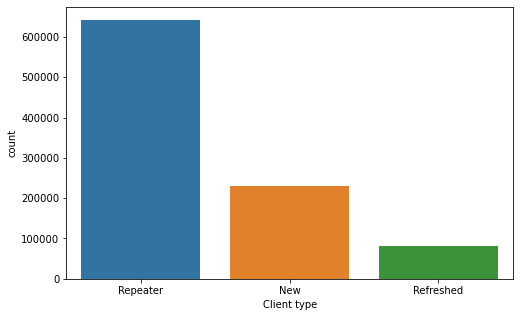

In [164]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=dataframe_merged)
ax.set(xlabel='Client type')

- Mostly the applicants were `Repeater`

#### Portfolio of the previous applications

[Text(0.5, 0, 'Portfolio')]

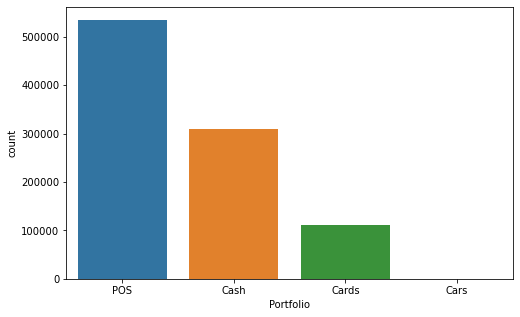

In [165]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=dataframe_merged)
ax.set(xlabel='Portfolio')

- The highest number of the previous applications was for POS. Applications for Cash also has good number. Applications for Cards were very few.

#### Application channel type

[Text(0.5, 0, 'Application channel')]

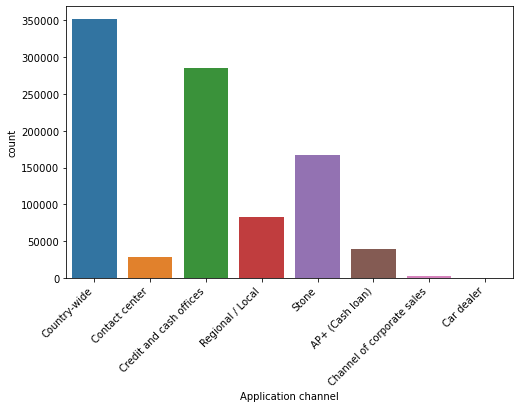

In [166]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=dataframe_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')

- We see that `Country-wide` was heavily used for previous applications followed by `Credit and Cash offices`, `Stone` and `Regional`. Rest other channels are hardly used. 

#### Applied loan amount

[Text(0.5, 0, 'Application amount')]

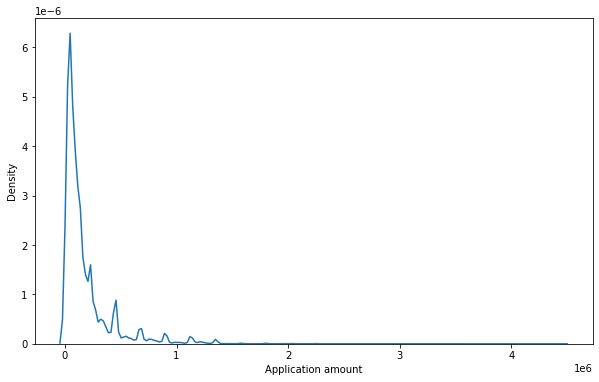

In [167]:
plt.figure(figsize=(10,6))
ax = sns.distplot(dataframe_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

- Most of the applications were for the amount of below 250000 as we see from the above distribution.

#### Credited loan amount

[Text(0.5, 0, 'Credited amount')]

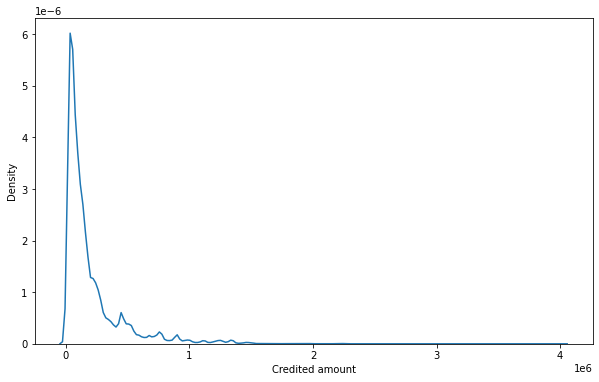

In [168]:
plt.figure(figsize=(10,6))
ax = sns.distplot(dataframe_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')

- The distribution of the credited amount of the loan was mostly in 250000 range.

#### Months took for the pervious application decision relative to the current application 

[Text(0.5, 0, 'Months')]

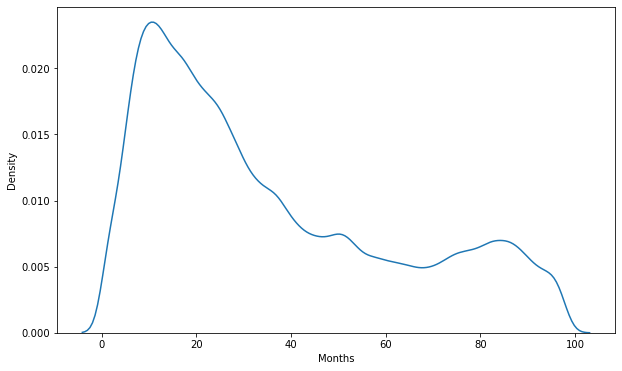

In [169]:
plt.figure(figsize=(10,6))
ax = sns.distplot(dataframe_merged['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')

- We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

## Bivariate analysis

#### Corelation of relevant numerical columns

In [170]:
# Listing the relevant columns for finding corelation
corr_columns = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [171]:
# Creating dataframe for numerical columns
merged_corr = dataframe_merged[corr_columns]
merged_corr.head()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
0,17145.0,17145.0,1730.430,100.00,12.0,3
1,607500.0,679671.0,25188.615,111.88,36.0,6
2,112500.0,136444.5,15060.735,121.28,12.0,11
4,337500.0,404055.0,31924.395,119.72,24.0,27
5,315000.0,340573.5,23703.930,108.12,18.0,23


In [172]:
# Corelation matrix
merged_corr.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
AMT_APPLICATION,1.000000,0.953389,0.830663,0.179395,0.592375,-0.288808
AMT_CREDIT,0.953389,1.000000,0.847825,0.261587,0.567978,-0.293229
AMT_ANNUITY,0.830663,0.847825,1.000000,0.200139,0.352648,-0.269146
PERCENT_CREDIT,0.179395,0.261587,0.200139,1.000000,0.391865,-0.264627
CNT_PAYMENT,0.592375,0.567978,0.352648,0.391865,1.000000,-0.197025
MONTH_DECISION,-0.288808,-0.293229,-0.269146,-0.264627,-0.197025,1.000000


<AxesSubplot:>

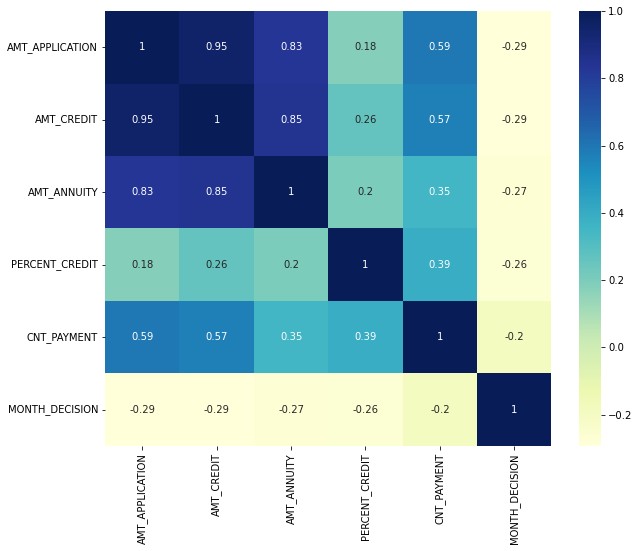

In [173]:
plt.figure(figsize=(10,8))
sns.heatmap(merged_corr.corr(),cmap="YlGnBu",annot=True)

**Highly corelate columns**
1. AMT_APPLICATION and AMT_CREDIT
2. AMT_APPLICATION and AMT_ANNUITY	
3. AMT_CREDIT and AMT_ANNUITY

**Moderately corelated columns**
1. AMT_APPLICATION and CNT_PAYMENT
2. AMT_CREDIT and CNT_PAYMENT

#### Application amount and credited amount

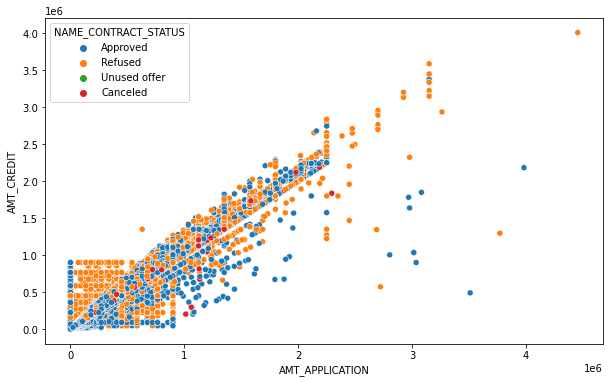

In [174]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=dataframe_merged)

- We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

#### Application amount and the month taken to take decision related to current application

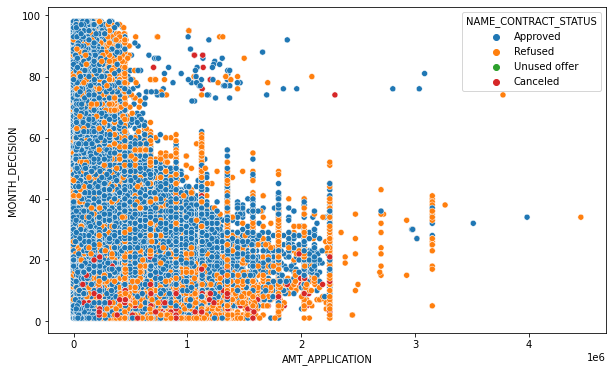

In [175]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=dataframe_merged)

- we can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application. 

#### Credit amount of the loan of various categories

In [176]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

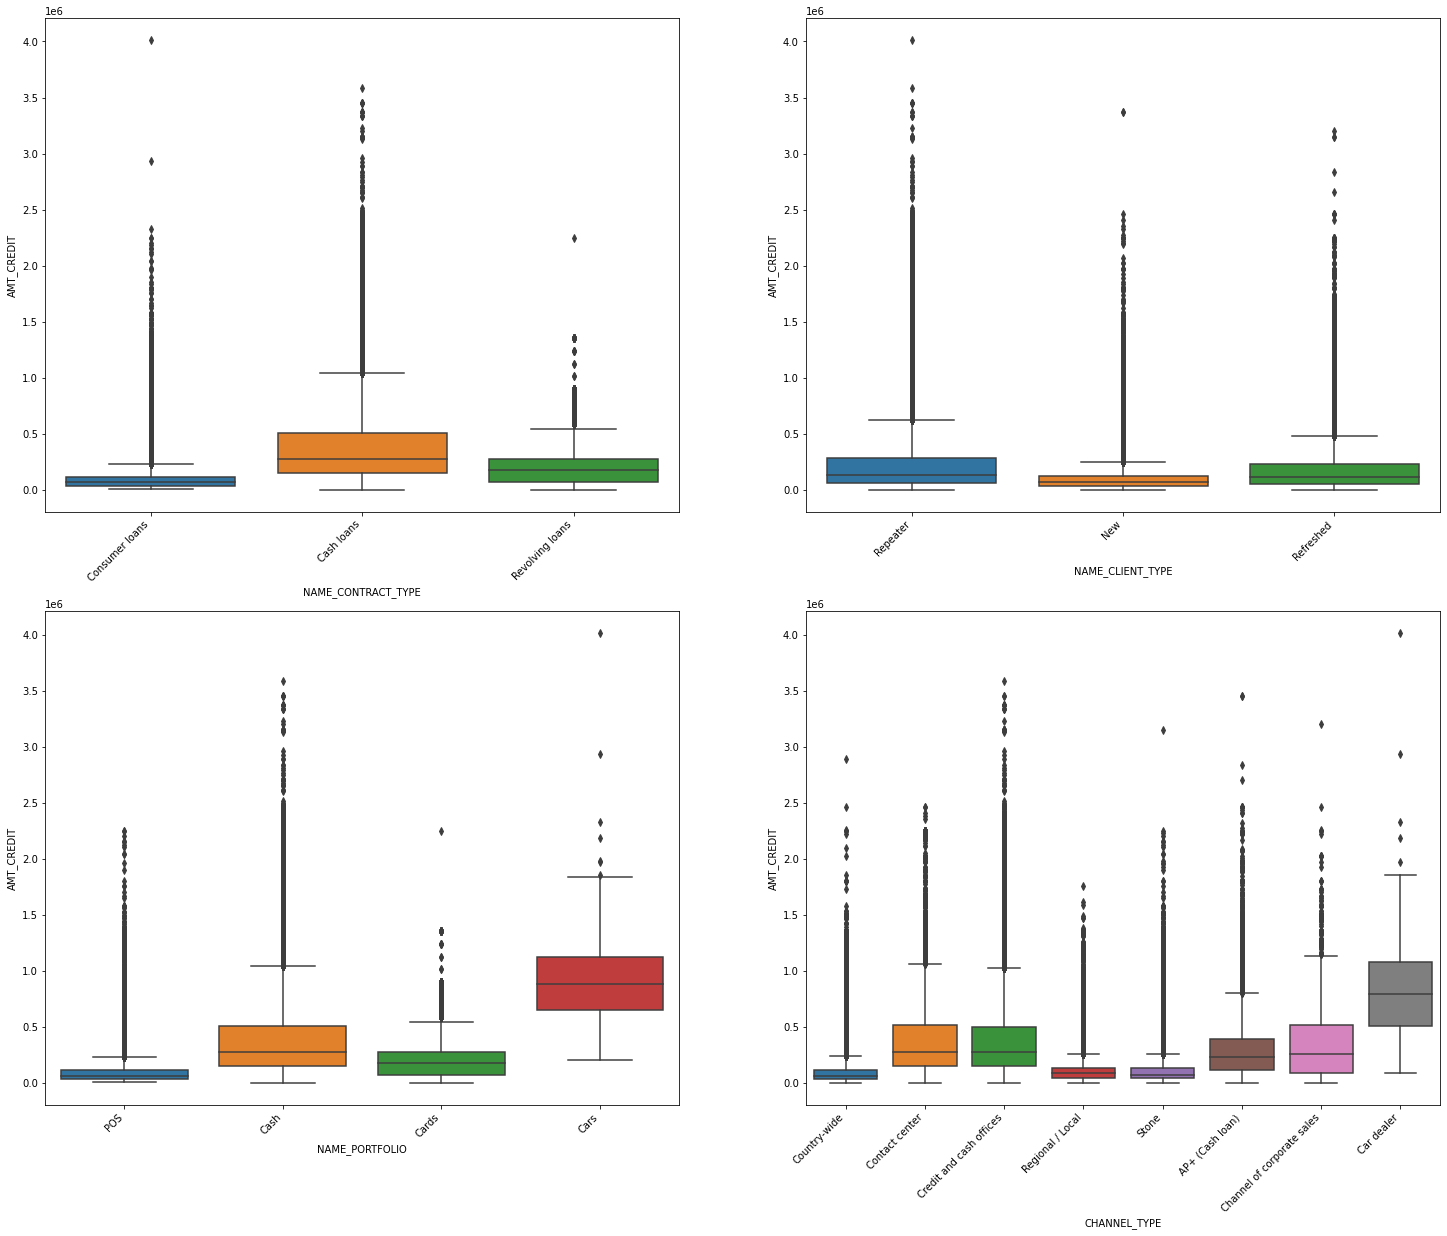

In [177]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=dataframe_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

-  `Cash loans` are more credited in amount than Revolving and Consumer loans.
-  `Repeater` clients get more amount loan than new and refreshed clients.
-  The loan with portfolio `Cars` are more amount credited followed by `Cash`.
-  The credit amount of the loan is more from the application channel type as `car dealer` followed by `Channel of corporate sales`, `Credit and cash offices` and `Contact center`. The amount is very less for `Regional`, `Stone` and `Country-wide` channels.

#### Anslysis of two segmented variables

#### Status and Client type

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

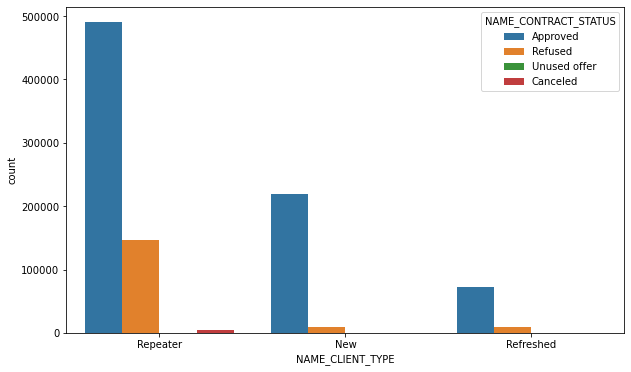

In [178]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = dataframe_merged )

- we see that the `Repeater` clients have more approved loans than `New` and `Refreshed` clients.

#### Current loan defaulter status with respect to previous loan application status

Text(0, 0.5, 'Current defaulters')

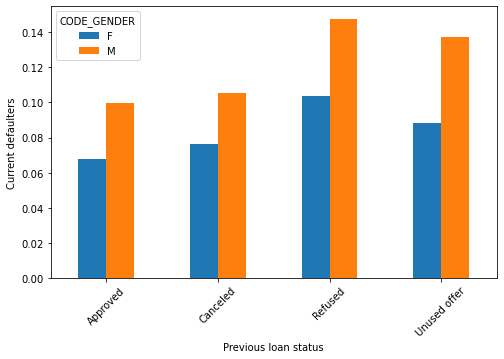

In [179]:
dataframe_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

- We see that previously `Refused` client is more defaulted than previously `Approved` clients. Also, in all the cases the `Males` are more defaulted than `Females`.

#### Current loan defaulter status with respect to previous loan application status and client types

Text(0, 0.5, 'Current defaulters')

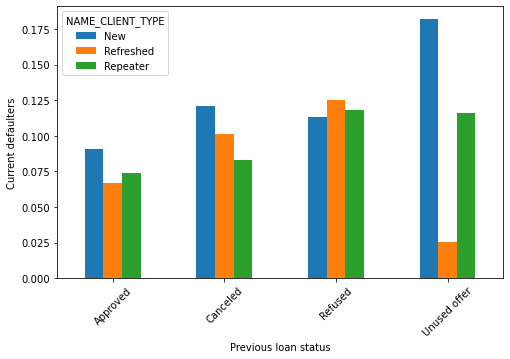

In [180]:
dataframe_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

-  We can see that the `Defaulters` are more for previously `Unused offers` loan status clients, who were `New`.
-  For previously `Approved` status the `New` clients were more defaulted followed by `Repeater`.
-  For previously `Refused` applicants the `Defaulters` are more `Refreshed` clients.
-  For previously `Canceled` applicants the `Defaulters` are more `New` clients.

#### Current loan defaulter status with respect to previous loan application status and age group

Text(0, 0.5, 'Current defaulters')

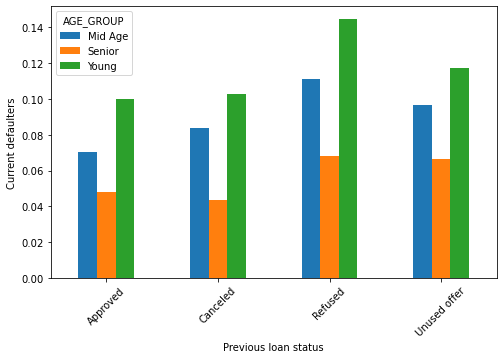

In [181]:
dataframe_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

- For all the previous status `Young` applicants are more defaulted.
- For all the previous status `Senior` applicants are less defaulted compared to others.

#### Current loan defaulter status with respect to previous loan application status and income group

Text(0, 0.5, 'Current defaulters')

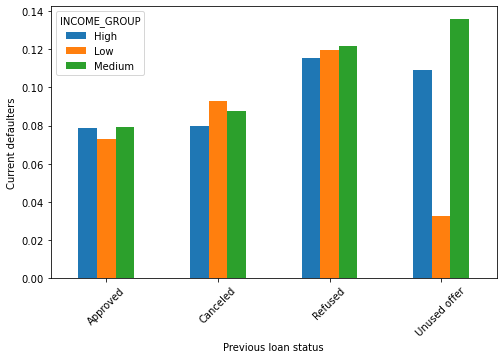

In [182]:
dataframe_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

-  For previously `Unused` offer the `Medium` income group was more defaulted and `Low` income group is the least.
-  For other application status more or less all the income groups are equally defaulted. 

#### Current loan defaulter status with respect to previous loan application status and portfolio of the loan

Text(0, 0.5, 'Current defaulters')

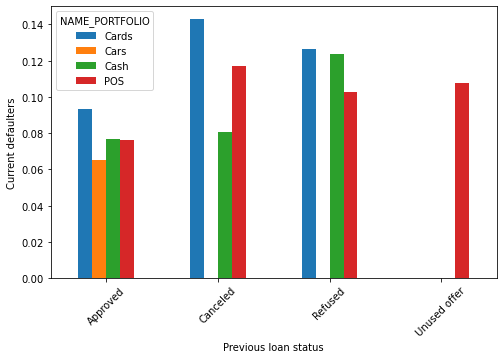

In [183]:
dataframe_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

-  Most of the clients were defaulted, who previously applied loan for `Cards`.
-  For approved loan status the clients applied for `Cars` are less defaulted.
-  For `Refused` loan status the clients applied for `POS` are less defaulted.

#### Current loan defaulter status with respect to previous loan application status and external source score category

Text(0, 0.5, 'Current defaulters')

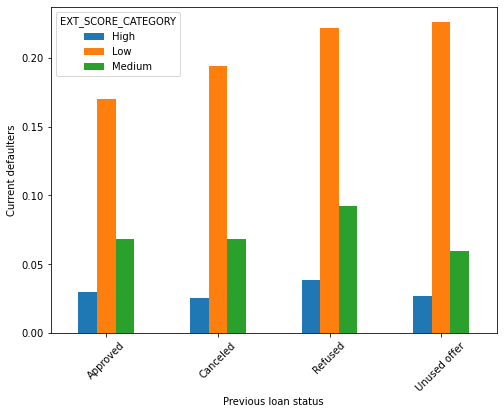

In [184]:
dataframe_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

- Applicants with low external source score are highly defaulted.
- Higher scorer applicants are very ulikely to default irrespective of their previous loan status.